# Wellbeing and Lifestyle Data Analysis

## Section 1: Exploratory Data Analysis (EDA)

This notebook performs comprehensive exploratory data analysis on the wellbeing and lifestyle dataset, including:
- Data quality checks
- Correlation analysis
- Distribution visualizations
- Outlier detection and handling
- Summary statistics by demographic groups


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")


Libraries imported successfully!


## 1.1 Load Dataset and Check Data Quality


In [2]:
# Load the dataset
df = pd.read_csv('Wellbeing_and_lifestyle_data_Kaggle.csv')

# Convert numeric columns to proper dtypes
# All columns except Timestamp, AGE, and GENDER should be numeric
numeric_columns = [col for col in df.columns if col not in ['Timestamp', 'AGE', 'GENDER']]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Display basic information
print("DATASET SHAPE")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\n")

# Display first few rows
print("FIRST 5 ROWS")
df.head()


DATASET SHAPE
Number of rows: 15972
Number of columns: 24


FIRST 5 ROWS


,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2.0,2,5,0,5,2,0,1,6,4,5,0,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3.0,4,3,8,10,5,2,2,5,2,5,5,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3.0,3,4,4,10,3,2,2,2,2,4,5,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3.0,10,3,10,7,2,5,2,3,5,5,0,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1.0,3,3,10,4,2,4,2,5,0,5,0,7,0,0,2,8,1,5,51 or more,Female,663.9


In [3]:
# Data types and basic information
print("DATASET INFO")
print("-" * 80)
df.info()
print("\n")

print("COLUMN NAMES")
print("-" * 80)
print(df.columns.tolist())


DATASET INFO
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15971 non-null  float64
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-n

In [4]:
# Check for missing values
print("MISSING VALUES")
print("-" * 80)

missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percent': missing_percent.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("No missing values found in the dataset!")
    
print(f"\nTotal missing values: {df.isnull().sum().sum()}")


MISSING VALUES
--------------------------------------------------------------------------------
      Column  Missing_Count  Missing_Percent
DAILY_STRESS              1         0.006261

Total missing values: 1


In [5]:
# Check for duplicate rows
print("DUPLICATE ROWS")
print("-" * 80)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
print(f"Percentage of duplicates: {(duplicates/len(df))*100:.2f}%")


DUPLICATE ROWS
--------------------------------------------------------------------------------
Number of duplicate rows: 482
Percentage of duplicates: 3.02%


In [6]:
# Basic descriptive statistics

print("DESCRIPTIVE STATISTICS FOR NUMERICAL FEATURES")

df.describe()


DESCRIPTIVE STATISTICS FOR NUMERICAL FEATURES


,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
count,15972.000000,15971.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000
mean,2.922677,2.791685,5.232970,5.508077,5.616454,6.474267,4.000751,2.715314,1.410656,5.745993,3.194778,5.703606,3.752129,7.042888,2.898886,2.930879,1.728963,5.711558,3.326572,6.233346,666.751503
std,1.442694,1.367801,3.311912,2.840334,3.242021,3.086672,2.755837,1.851586,0.491968,2.624097,2.357518,2.891013,3.230987,1.199044,3.692180,2.676301,0.444509,3.089630,2.729293,3.016571,45.019868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,480.000000
25%,2.000000,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,1.000000,1.000000,4.000000,1.000000,3.000000,1.000000,6.000000,0.000000,1.000000,1.000000,3.000000,1.000000,4.000000,636.000000
50%,3.000000,3.000000,5.000000,5.000000,5.000000,6.000000,3.000000,3.000000,1.000000,6.000000,3.000000,5.000000,3.000000,7.000000,0.000000,2.000000,2.000000,5.000000,3.000000,7.000000,667.700000
75%,4.000000,4.000000,8.000000,8.000000,10.000000,10.000000,6.000000,5.000000,2.000000,8.000000,5.000000,8.000000,5.000000,8.000000,5.000000,4.000000,2.000000,9.000000,5.000000,10.000000,698.500000
max,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000,820.200000


In [7]:
# Check categorical variables
print("CATEGORICAL VARIABLES DISTRIBUTION")
print("-" * 80)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}\n")

for col in categorical_cols:
    if col != 'Timestamp':  # Skip timestamp
        print(f"\n{col}:")
        print(df[col].value_counts())
        print(f"Unique values: {df[col].nunique()}")


CATEGORICAL VARIABLES DISTRIBUTION
--------------------------------------------------------------------------------
Categorical columns: ['Timestamp', 'AGE', 'GENDER']


AGE:
AGE
21 to 35        6108
36 to 50        4655
51 or more      3390
Less than 20    1819
Name: count, dtype: int64
Unique values: 4

GENDER:
GENDER
Female    9858
Male      6114
Name: count, dtype: int64
Unique values: 2


## 1.2 Correlation Analysis


In [8]:
# Select only numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical columns for correlation: {len(numerical_cols)}")
print(numerical_cols)


Numerical columns for correlation: 21
['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'WORK_LIFE_BALANCE_SCORE']


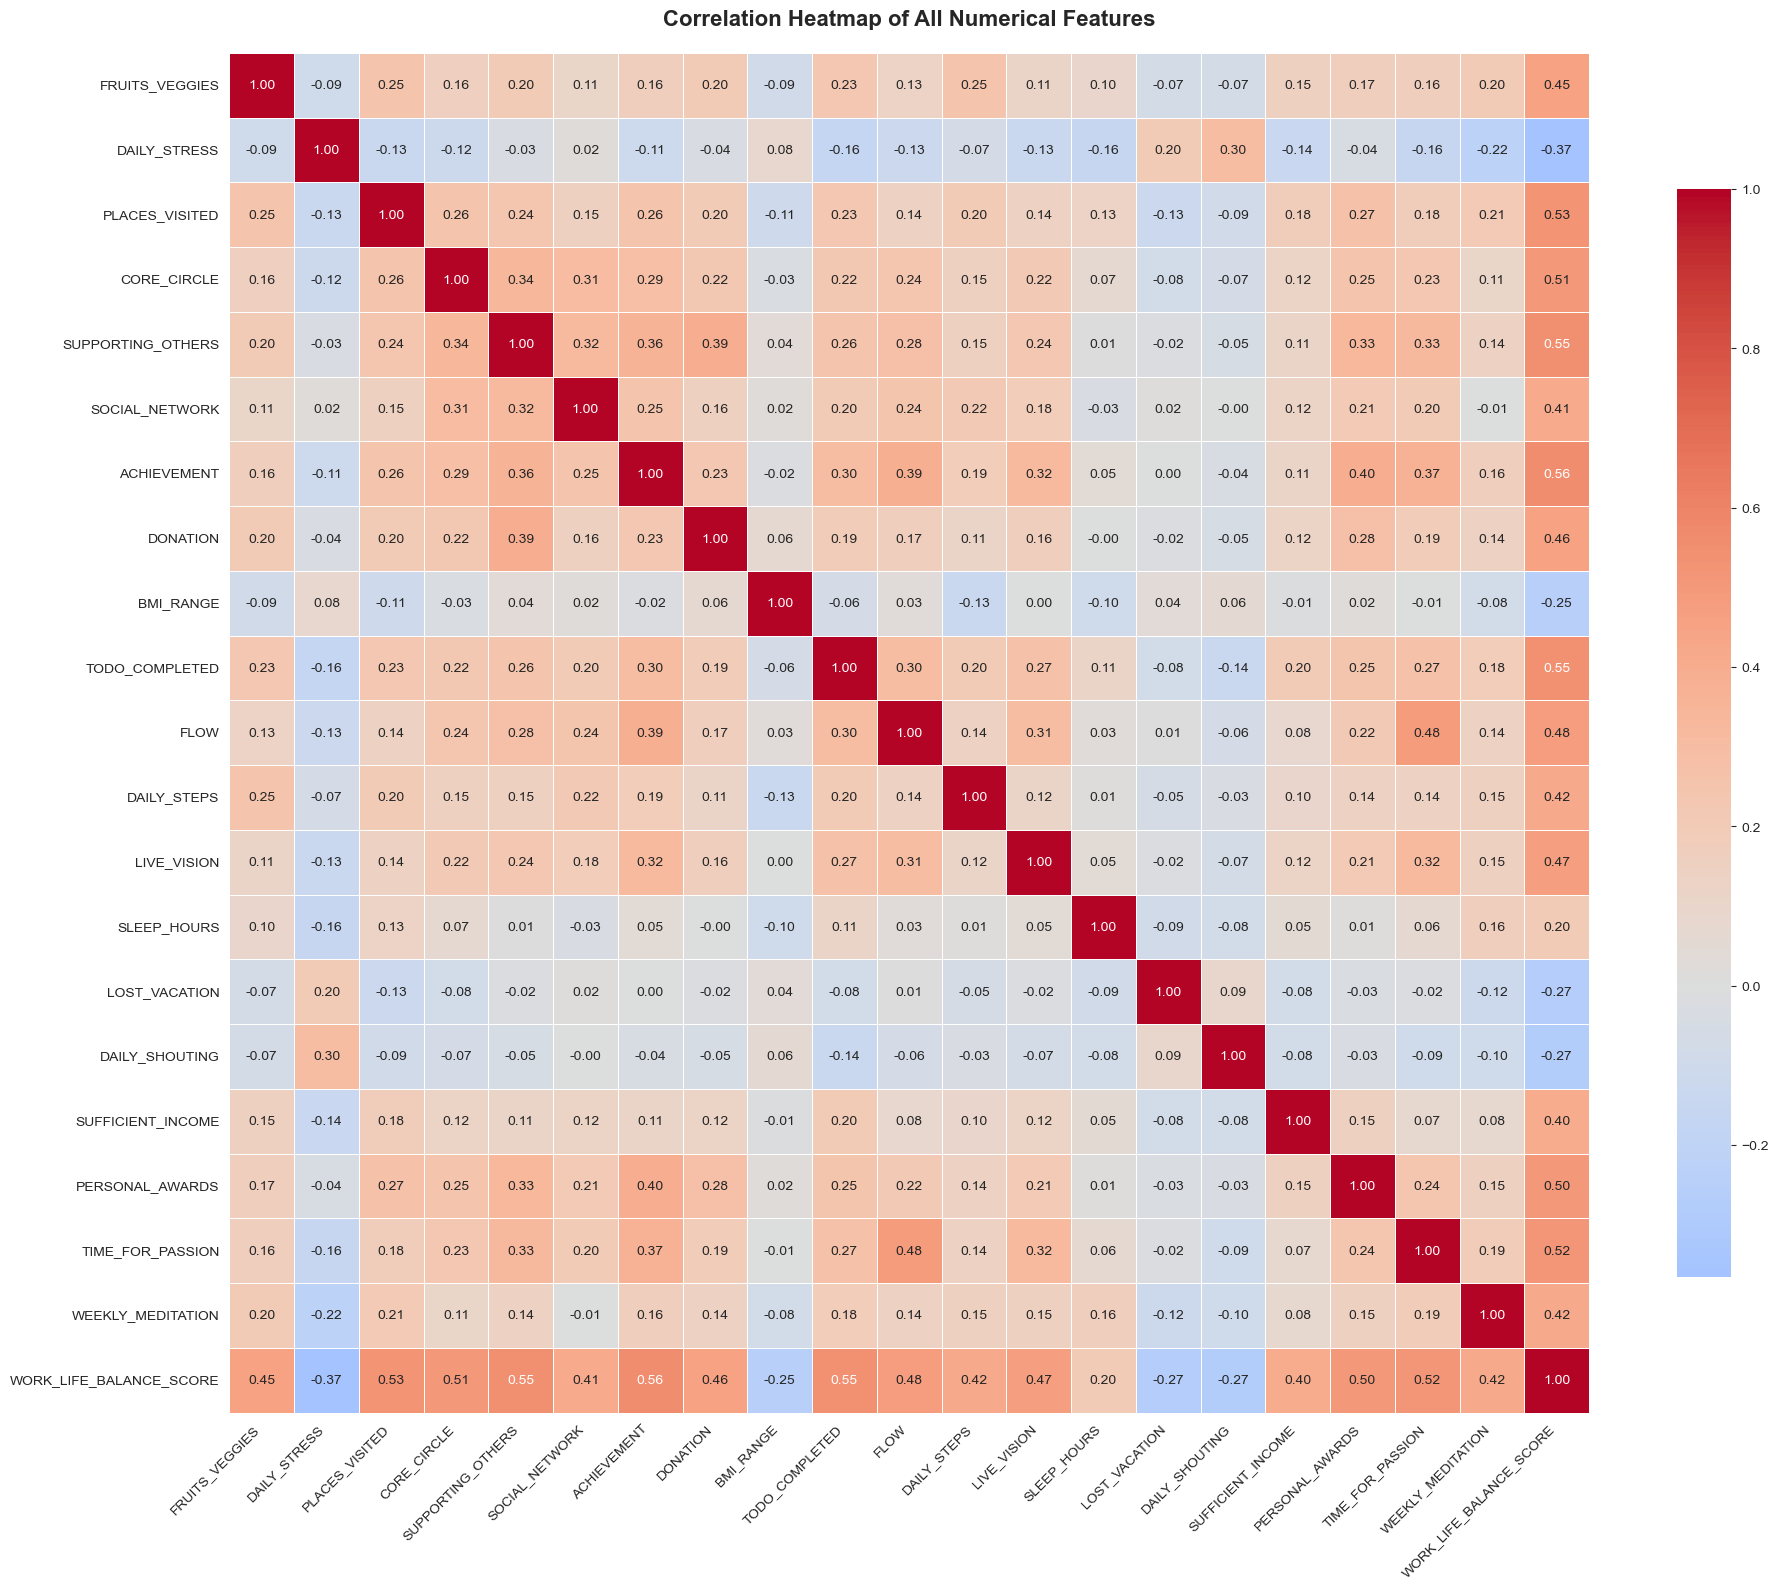


Correlation Matrix Shape: (21, 21)


In [9]:
# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create a large figure for the correlation heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of All Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nCorrelation Matrix Shape:", correlation_matrix.shape)


In [10]:
# Find strongest correlations with WORK_LIFE_BALANCE_SCORE (target variable)
print("TOP CORRELATIONS WITH WORK_LIFE_BALANCE_SCORE")
print("-" * 80)

target_correlations = correlation_matrix['WORK_LIFE_BALANCE_SCORE'].sort_values(ascending=False)
print("\nTop positive correlations:")
print(target_correlations.head(10))

print("\nTop negative correlations:")
print(target_correlations.tail(10))


TOP CORRELATIONS WITH WORK_LIFE_BALANCE_SCORE
--------------------------------------------------------------------------------

Top positive correlations:
WORK_LIFE_BALANCE_SCORE    1.000000
ACHIEVEMENT                0.561244
SUPPORTING_OTHERS          0.548851
TODO_COMPLETED             0.545503
PLACES_VISITED             0.529615
TIME_FOR_PASSION           0.516967
CORE_CIRCLE                0.507541
PERSONAL_AWARDS            0.504224
FLOW                       0.478199
LIVE_VISION                0.471311
Name: WORK_LIFE_BALANCE_SCORE, dtype: float64

Top negative correlations:
FRUITS_VEGGIES       0.452255
DAILY_STEPS          0.422981
WEEKLY_MEDITATION    0.416171
SOCIAL_NETWORK       0.412586
SUFFICIENT_INCOME    0.403561
SLEEP_HOURS          0.196395
BMI_RANGE           -0.251988
LOST_VACATION       -0.266243
DAILY_SHOUTING      -0.273153
DAILY_STRESS        -0.365399
Name: WORK_LIFE_BALANCE_SCORE, dtype: float64


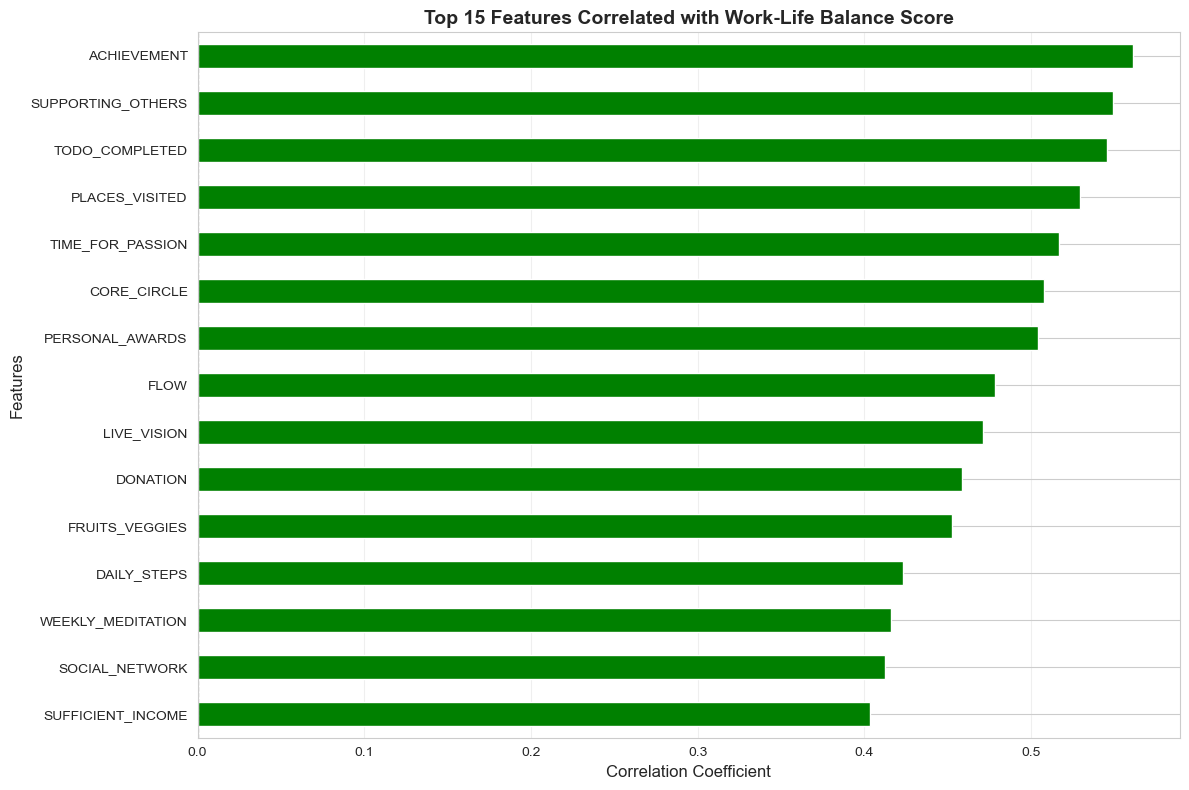

In [11]:
# Visualize top correlations with target variable
top_features = target_correlations.abs().sort_values(ascending=False)[1:16]  # Exclude itself, take top 15

plt.figure(figsize=(12, 8))
top_features.sort_values().plot(kind='barh', color=['red' if x < 0 else 'green' for x in top_features.sort_values()])
plt.title('Top 15 Features Correlated with Work-Life Balance Score', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


## 1.3 Distribution Visualizations


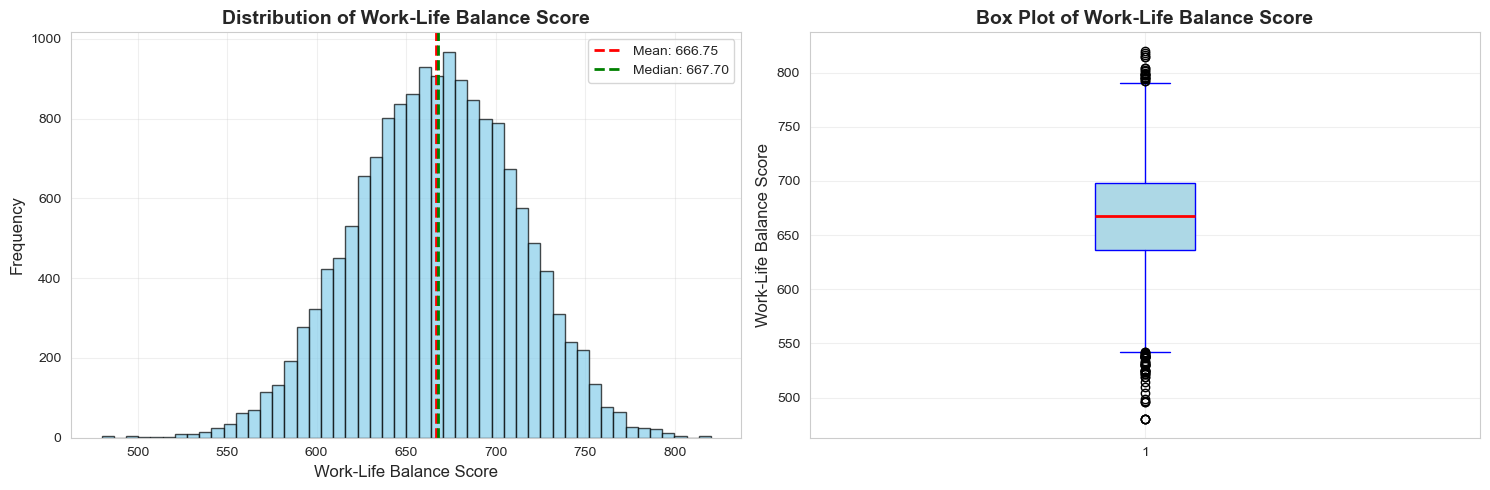

Mean: 666.75
Median: 667.70
Std Dev: 45.02
Min: 480.00
Max: 820.20


In [12]:
# Distribution of the target variable (WORK_LIFE_BALANCE_SCORE)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['WORK_LIFE_BALANCE_SCORE'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Work-Life Balance Score', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Work-Life Balance Score', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].axvline(df['WORK_LIFE_BALANCE_SCORE'].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Mean: {df["WORK_LIFE_BALANCE_SCORE"].mean():.2f}')
axes[0].axvline(df['WORK_LIFE_BALANCE_SCORE'].median(), color='green', linestyle='--', 
                linewidth=2, label=f'Median: {df["WORK_LIFE_BALANCE_SCORE"].median():.2f}')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(df['WORK_LIFE_BALANCE_SCORE'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(color='blue'),
                capprops=dict(color='blue'))
axes[1].set_title('Box Plot of Work-Life Balance Score', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Work-Life Balance Score', fontsize=12)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print(f"Mean: {df['WORK_LIFE_BALANCE_SCORE'].mean():.2f}")
print(f"Median: {df['WORK_LIFE_BALANCE_SCORE'].median():.2f}")
print(f"Std Dev: {df['WORK_LIFE_BALANCE_SCORE'].std():.2f}")
print(f"Min: {df['WORK_LIFE_BALANCE_SCORE'].min():.2f}")
print(f"Max: {df['WORK_LIFE_BALANCE_SCORE'].max():.2f}")


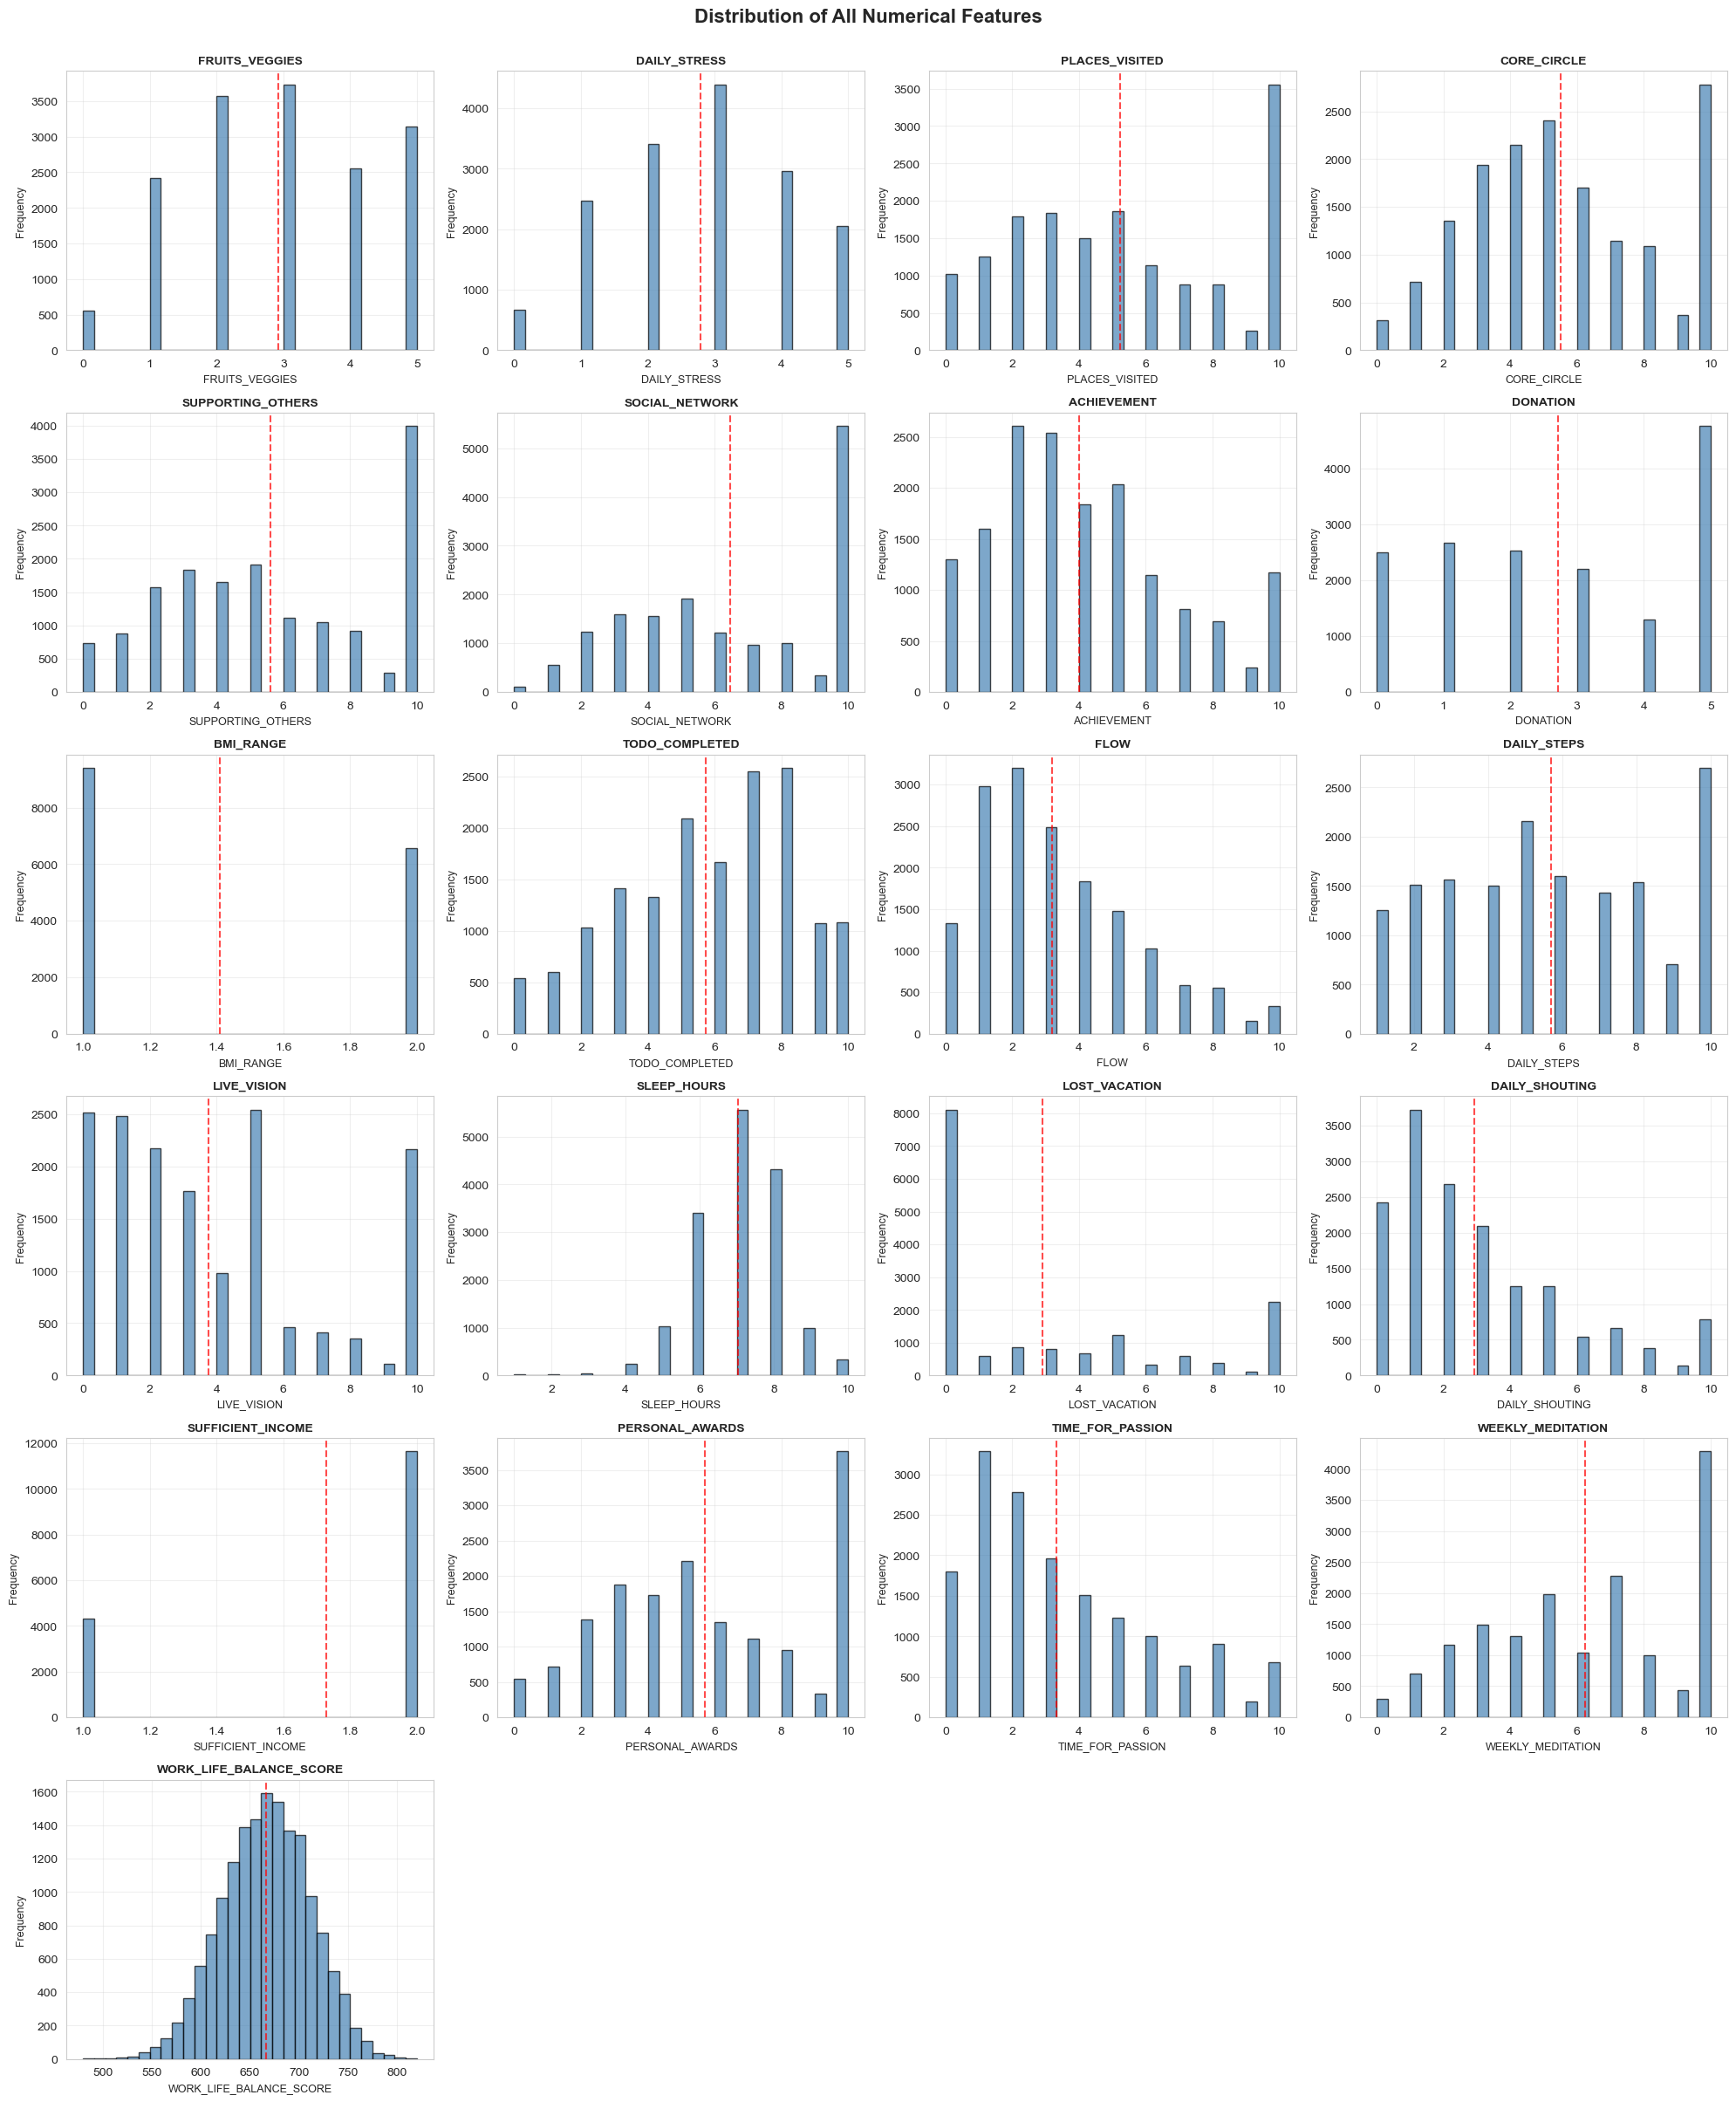

In [13]:
# Create histograms for all numerical features
# Exclude Timestamp if present in numerical columns
plot_cols = [col for col in numerical_cols if col != 'Timestamp']

# Calculate grid dimensions
n_cols = 4
n_rows = int(np.ceil(len(plot_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(plot_cols):
    axes[idx].hist(df[col].dropna(), bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=9)
    axes[idx].grid(alpha=0.3)
    
    # Add mean line
    mean_val = df[col].mean()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=1.5, alpha=0.7)

# Hide extra subplots
for idx in range(len(plot_cols), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Distribution of All Numerical Features', fontsize=16, fontweight='bold', y=1.002)
plt.tight_layout()
plt.show()


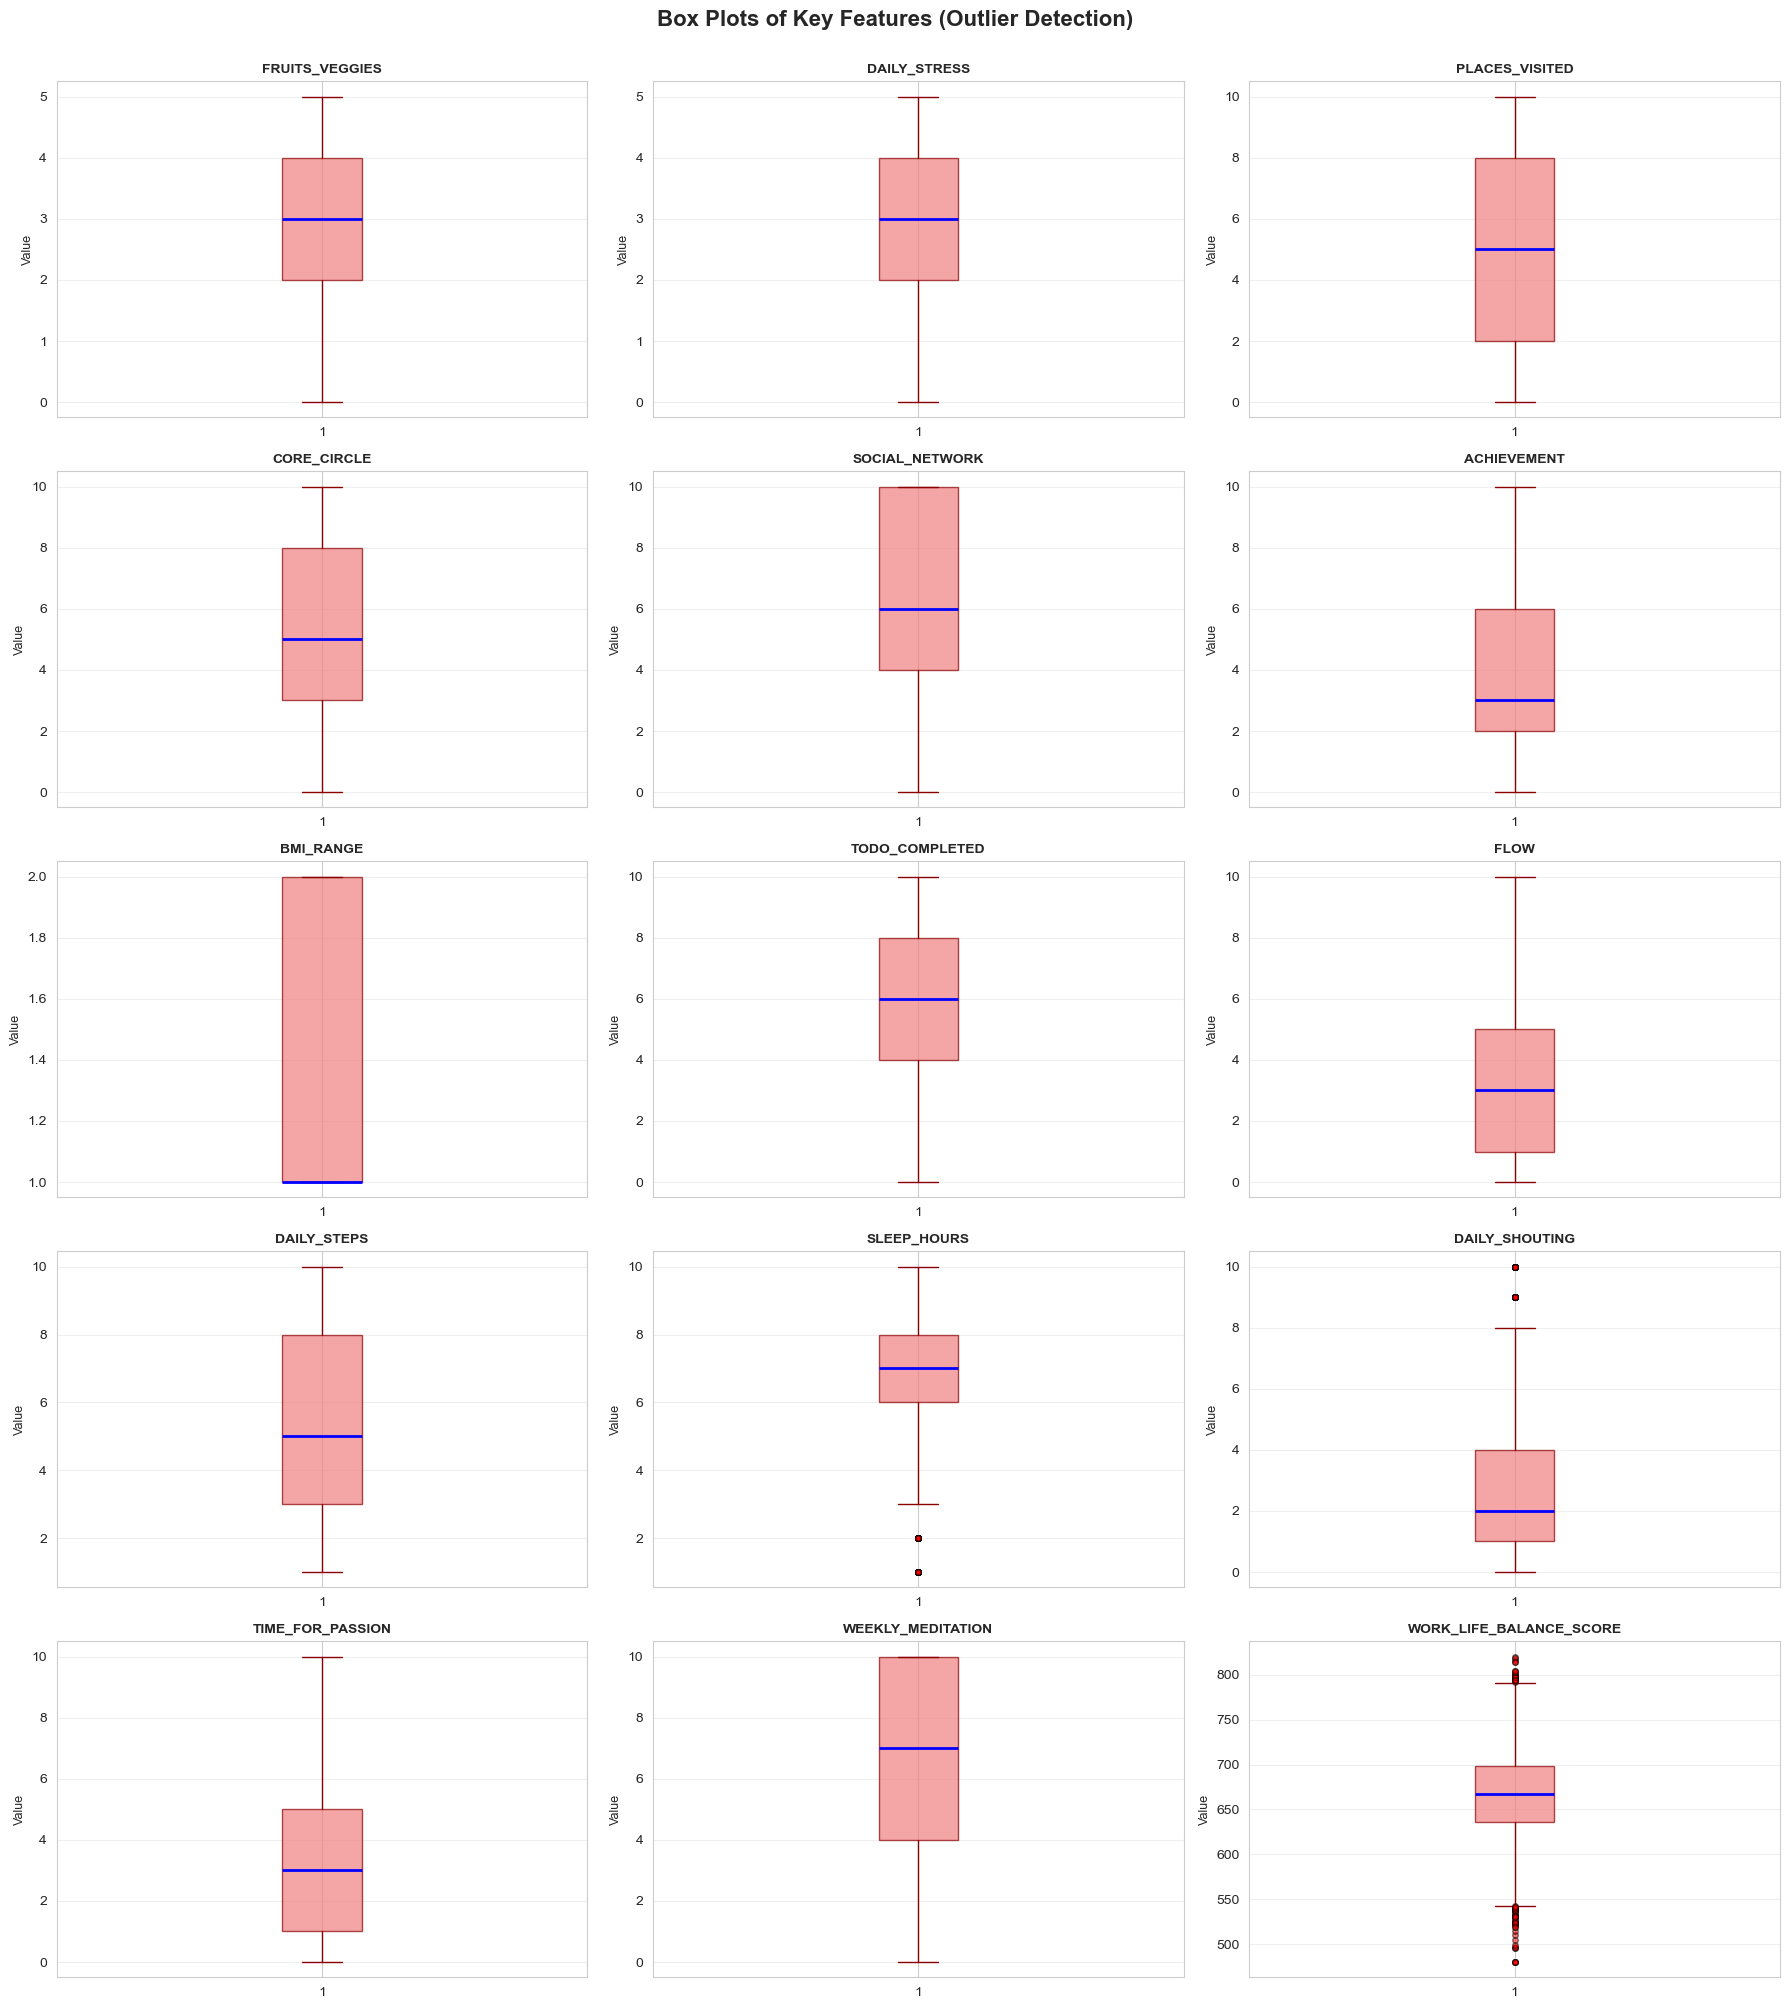

In [14]:
# Create box plots for key features to visualize spread and outliers
key_features = ['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE', 
                'SOCIAL_NETWORK', 'ACHIEVEMENT', 'BMI_RANGE', 'TODO_COMPLETED',
                'FLOW', 'DAILY_STEPS', 'SLEEP_HOURS', 'DAILY_SHOUTING',
                'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'WORK_LIFE_BALANCE_SCORE']

n_cols = 3
n_rows = int(np.ceil(len(key_features) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(key_features):
    bp = axes[idx].boxplot(df[col].dropna(), vert=True, patch_artist=True,
                           boxprops=dict(facecolor='lightcoral', color='darkred', alpha=0.7),
                           medianprops=dict(color='blue', linewidth=2),
                           whiskerprops=dict(color='darkred'),
                           capprops=dict(color='darkred'),
                           flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.5))
    axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')
    axes[idx].set_ylabel('Value', fontsize=9)
    axes[idx].grid(alpha=0.3, axis='y')

# Hide extra subplots
for idx in range(len(key_features), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Box Plots of Key Features (Outlier Detection)', fontsize=16, fontweight='bold', y=1.002)
plt.tight_layout()
plt.show()


## 1.4 Outlier Detection and Handling


In [15]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers for all numerical columns
print("OUTLIER DETECTION (IQR METHOD)")
print("-" * 80)

outlier_summary = []

for col in plot_cols:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(df)) * 100
    
    outlier_summary.append({
        'Feature': col,
        'Outlier_Count': outlier_count,
        'Outlier_Percent': outlier_percent,
        'Lower_Bound': lower,
        'Upper_Bound': upper
    })

outlier_df = pd.DataFrame(outlier_summary).sort_values('Outlier_Count', ascending=False)
print(outlier_df.to_string(index=False))


OUTLIER DETECTION (IQR METHOD)
--------------------------------------------------------------------------------
                Feature  Outlier_Count  Outlier_Percent  Lower_Bound  Upper_Bound
         DAILY_SHOUTING            930         5.822690        -3.50         8.50
WORK_LIFE_BALANCE_SCORE             71         0.444528       542.25       792.25
            SLEEP_HOURS             39         0.244177         3.00        11.00
            DAILY_STEPS              0         0.000000        -4.50        15.50
      WEEKLY_MEDITATION              0         0.000000        -5.00        19.00
       TIME_FOR_PASSION              0         0.000000        -5.00        11.00
        PERSONAL_AWARDS              0         0.000000        -6.00        18.00
      SUFFICIENT_INCOME              0         0.000000        -0.50         3.50
          LOST_VACATION              0         0.000000        -7.50        12.50
            LIVE_VISION              0         0.000000        -5.00

In [16]:
# Outlier handling strategy
print("OUTLIER HANDLING STRATEGY")
print("-" * 80)

# Create a copy for clean data
df_clean = df.copy()

# For this analysis, we'll use capping method (Winsorization) for extreme outliers
# This preserves the data while reducing the impact of extreme values

def cap_outliers(data, column, lower_percentile=0.01, upper_percentile=0.99):
    """Cap outliers at specified percentiles"""
    lower_cap = data[column].quantile(lower_percentile)
    upper_cap = data[column].quantile(upper_percentile)
    
    original_min = data[column].min()
    original_max = data[column].max()
    
    data[column] = data[column].clip(lower=lower_cap, upper=upper_cap)
    
    return data, lower_cap, upper_cap, original_min, original_max

# Apply capping to features with significant outliers (>5% outliers)
features_to_cap = outlier_df[outlier_df['Outlier_Percent'] > 5]['Feature'].tolist()

print(f"\nFeatures with >5% outliers to be capped: {len(features_to_cap)}")
print(features_to_cap)

capping_summary = []

for col in features_to_cap:
    df_clean, lower_cap, upper_cap, orig_min, orig_max = cap_outliers(df_clean, col)
    capping_summary.append({
        'Feature': col,
        'Original_Min': orig_min,
        'Original_Max': orig_max,
        'Capped_Lower': lower_cap,
        'Capped_Upper': upper_cap
    })

if len(capping_summary) > 0:
    print("\nCapping Summary:")
    print(pd.DataFrame(capping_summary).to_string(index=False))
else:
    print("\nNo features required capping (all features have <5% outliers).")

print(f"\nClean dataset shape: {df_clean.shape}")
print(f"Original dataset shape: {df.shape}")


OUTLIER HANDLING STRATEGY
--------------------------------------------------------------------------------

Features with >5% outliers to be capped: 1
['DAILY_SHOUTING']

Capping Summary:
       Feature  Original_Min  Original_Max  Capped_Lower  Capped_Upper
DAILY_SHOUTING             0            10           0.0          10.0

Clean dataset shape: (15972, 24)
Original dataset shape: (15972, 24)


## 1.5 Summary Statistics by Demographics


In [17]:
# Ensure all numerical columns are properly typed
# Convert object columns to numeric where appropriate
print("DATA TYPE VERIFICATION AND CONVERSION")
print("-" * 80)

print("\nData types before conversion:")
print(df_clean.dtypes)

# Convert all numerical feature columns to numeric type
for col in numerical_cols:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')


print("Data types after conversion:")
print(df_clean.dtypes)

# Check if any conversions resulted in NaN

print("Missing values after type conversion:")
print(df_clean.isnull().sum().sum())


DATA TYPE VERIFICATION AND CONVERSION
--------------------------------------------------------------------------------

Data types before conversion:
Timestamp                   object
FRUITS_VEGGIES               int64
DAILY_STRESS               float64
PLACES_VISITED               int64
CORE_CIRCLE                  int64
SUPPORTING_OTHERS            int64
SOCIAL_NETWORK               int64
ACHIEVEMENT                  int64
DONATION                     int64
BMI_RANGE                    int64
TODO_COMPLETED               int64
FLOW                         int64
DAILY_STEPS                  int64
LIVE_VISION                  int64
SLEEP_HOURS                  int64
LOST_VACATION                int64
DAILY_SHOUTING               int64
SUFFICIENT_INCOME            int64
PERSONAL_AWARDS              int64
TIME_FOR_PASSION             int64
WEEKLY_MEDITATION            int64
AGE                         object
GENDER                      object
WORK_LIFE_BALANCE_SCORE    float64
dtype: obj

In [18]:
# Summary statistics by Gender
print("SUMMARY STATISTICS BY GENDER")
print("-" * 80)

print("\nGender Distribution:")
print(df_clean['GENDER'].value_counts())
print(f"\nGender proportions:")
print(df_clean['GENDER'].value_counts(normalize=True) * 100)

print("WORK-LIFE BALANCE SCORE BY GENDER")
print("-" * 80)
gender_stats = df_clean.groupby('GENDER')['WORK_LIFE_BALANCE_SCORE'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)
print(gender_stats)


SUMMARY STATISTICS BY GENDER
--------------------------------------------------------------------------------

Gender Distribution:
GENDER
Female    9858
Male      6114
Name: count, dtype: int64

Gender proportions:
GENDER
Female    61.720511
Male      38.279489
Name: proportion, dtype: float64
WORK-LIFE BALANCE SCORE BY GENDER
--------------------------------------------------------------------------------
        count    mean  median    std    min    max
GENDER                                            
Female   9858  668.17   669.2  44.18  480.0  802.6
Male     6114  664.47   664.3  46.26  480.0  820.2


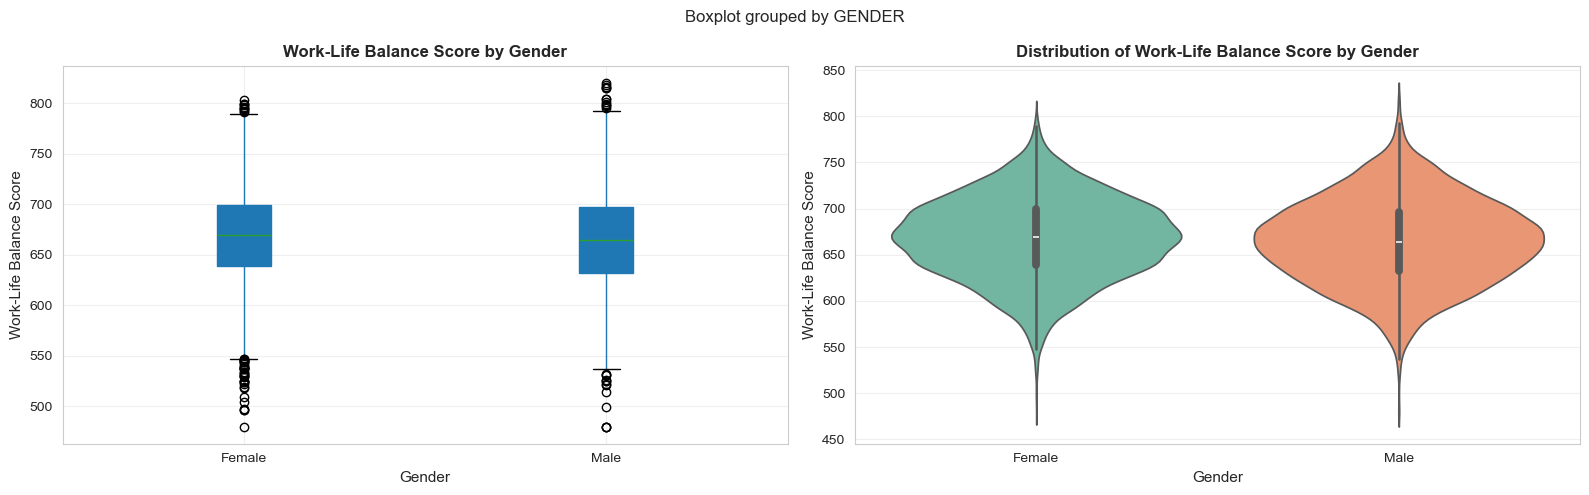

In [19]:
# Visualize Work-Life Balance Score by Gender
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Box plot
df_clean.boxplot(column='WORK_LIFE_BALANCE_SCORE', by='GENDER', ax=axes[0], patch_artist=True)
axes[0].set_title('Work-Life Balance Score by Gender', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Gender', fontsize=11)
axes[0].set_ylabel('Work-Life Balance Score', fontsize=11)
axes[0].grid(alpha=0.3)
plt.sca(axes[0])
plt.xticks(rotation=0)

# Violin plot
import seaborn as sns
sns.violinplot(data=df_clean, x='GENDER', y='WORK_LIFE_BALANCE_SCORE', ax=axes[1], palette='Set2')
axes[1].set_title('Distribution of Work-Life Balance Score by Gender', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Gender', fontsize=11)
axes[1].set_ylabel('Work-Life Balance Score', fontsize=11)
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


In [20]:
# Summary statistics by Age Group
print("SUMMARY STATISTICS BY AGE GROUP")
print("-" * 80)

print("\nAge Group Distribution:")
print(df_clean['AGE'].value_counts().sort_index())
print(f"\nAge Group proportions:")
print(df_clean['AGE'].value_counts(normalize=True).sort_index() * 100)

print("WORK-LIFE BALANCE SCORE BY AGE GROUP")
print("-" * 80)
age_stats = df_clean.groupby('AGE')['WORK_LIFE_BALANCE_SCORE'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)
print(age_stats)


SUMMARY STATISTICS BY AGE GROUP
--------------------------------------------------------------------------------

Age Group Distribution:
AGE
21 to 35        6108
36 to 50        4655
51 or more      3390
Less than 20    1819
Name: count, dtype: int64

Age Group proportions:
AGE
21 to 35        38.241923
36 to 50        29.144753
51 or more      21.224643
Less than 20    11.388680
Name: proportion, dtype: float64
WORK-LIFE BALANCE SCORE BY AGE GROUP
--------------------------------------------------------------------------------
              count    mean  median    std    min    max
AGE                                                     
21 to 35       6108  661.07   661.6  43.75  480.0  804.3
36 to 50       4655  667.25   668.1  45.45  497.0  820.2
51 or more     3390  677.71   680.0  45.22  480.0  814.5
Less than 20   1819  664.11   666.0  44.01  480.0  818.3


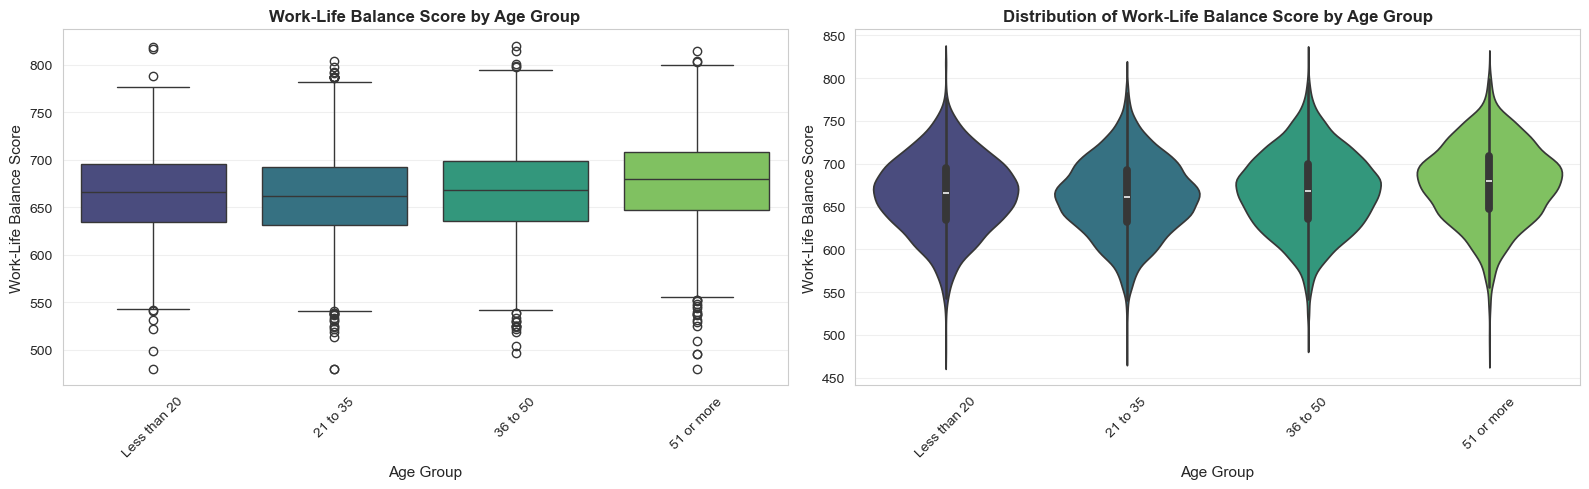

In [21]:
# Visualize Work-Life Balance Score by Age Group
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Define age order for proper sorting
age_order = ['Less than 20', '21 to 35', '36 to 50', '51 or more']

# Box plot
sns.boxplot(data=df_clean, x='AGE', y='WORK_LIFE_BALANCE_SCORE', ax=axes[0], 
            order=age_order, palette='viridis')
axes[0].set_title('Work-Life Balance Score by Age Group', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Age Group', fontsize=11)
axes[0].set_ylabel('Work-Life Balance Score', fontsize=11)
axes[0].grid(alpha=0.3, axis='y')
axes[0].tick_params(axis='x', rotation=45)

# Violin plot
sns.violinplot(data=df_clean, x='AGE', y='WORK_LIFE_BALANCE_SCORE', ax=axes[1], 
               order=age_order, palette='viridis')
axes[1].set_title('Distribution of Work-Life Balance Score by Age Group', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Age Group', fontsize=11)
axes[1].set_ylabel('Work-Life Balance Score', fontsize=11)
axes[1].grid(alpha=0.3, axis='y')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


WORK-LIFE BALANCE SCORE BY GENDER AND AGE GROUP
--------------------------------------------------------------------------------
                     count    mean    std
AGE          GENDER                      
21 to 35     Female   3541  662.02  43.03
             Male     2567  659.77  44.70
36 to 50     Female   2961  669.01  43.82
             Male     1694  664.18  48.03
51 or more   Female   2291  678.51  45.24
             Male     1099  676.05  45.17
Less than 20 Female   1065  664.01  42.44
             Male      754  664.25  46.15


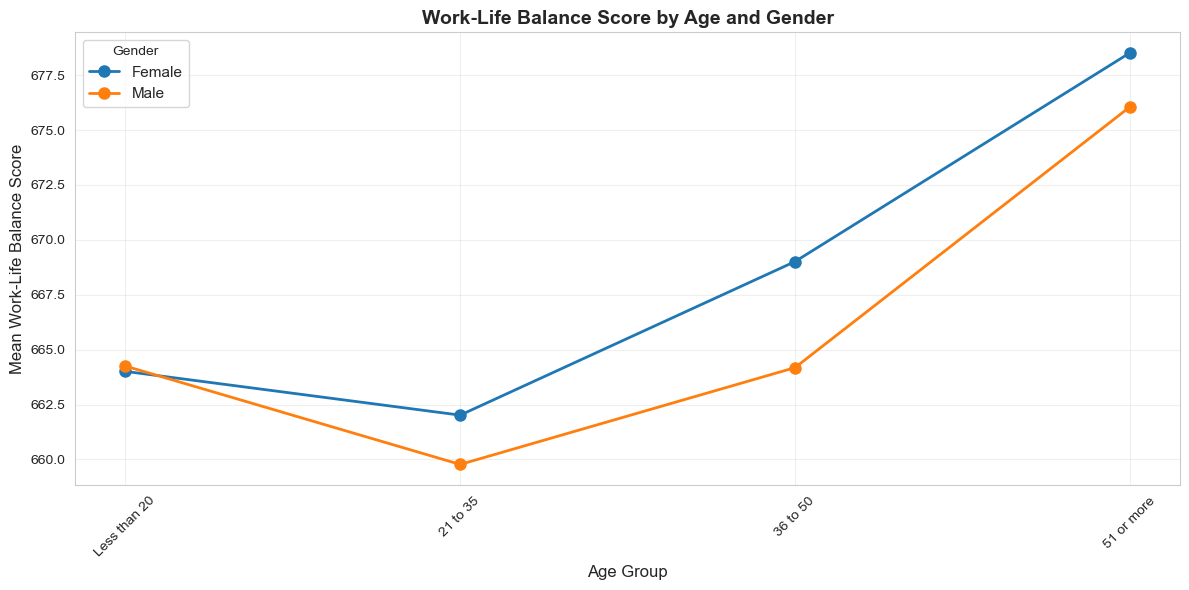

In [22]:
# Combined Analysis: Gender x Age Group
print("WORK-LIFE BALANCE SCORE BY GENDER AND AGE GROUP")
print("-" * 80)

# Create pivot table
pivot_stats = df_clean.groupby(['AGE', 'GENDER'])['WORK_LIFE_BALANCE_SCORE'].agg([
    'count', 'mean', 'std'
]).round(2)
print(pivot_stats)

# Visualize interaction
plt.figure(figsize=(12, 6))
for gender in df_clean['GENDER'].unique():
    gender_data = df_clean[df_clean['GENDER'] == gender]
    age_means = gender_data.groupby('AGE')['WORK_LIFE_BALANCE_SCORE'].mean().reindex(age_order)
    plt.plot(age_order, age_means, marker='o', linewidth=2, markersize=8, label=gender)

plt.title('Work-Life Balance Score by Age and Gender', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Mean Work-Life Balance Score', fontsize=12)
plt.legend(title='Gender', fontsize=11)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KEY LIFESTYLE FEATURES BY GENDER
--------------------------------------------------------------------------------
GENDER             Female  Male
FRUITS_VEGGIES       3.05  2.72
DAILY_STRESS         2.92  2.58
SLEEP_HOURS          7.10  6.95
DAILY_STEPS          5.62  5.84
WEEKLY_MEDITATION    6.03  6.57
TIME_FOR_PASSION     3.29  3.38
FLOW                 3.23  3.14


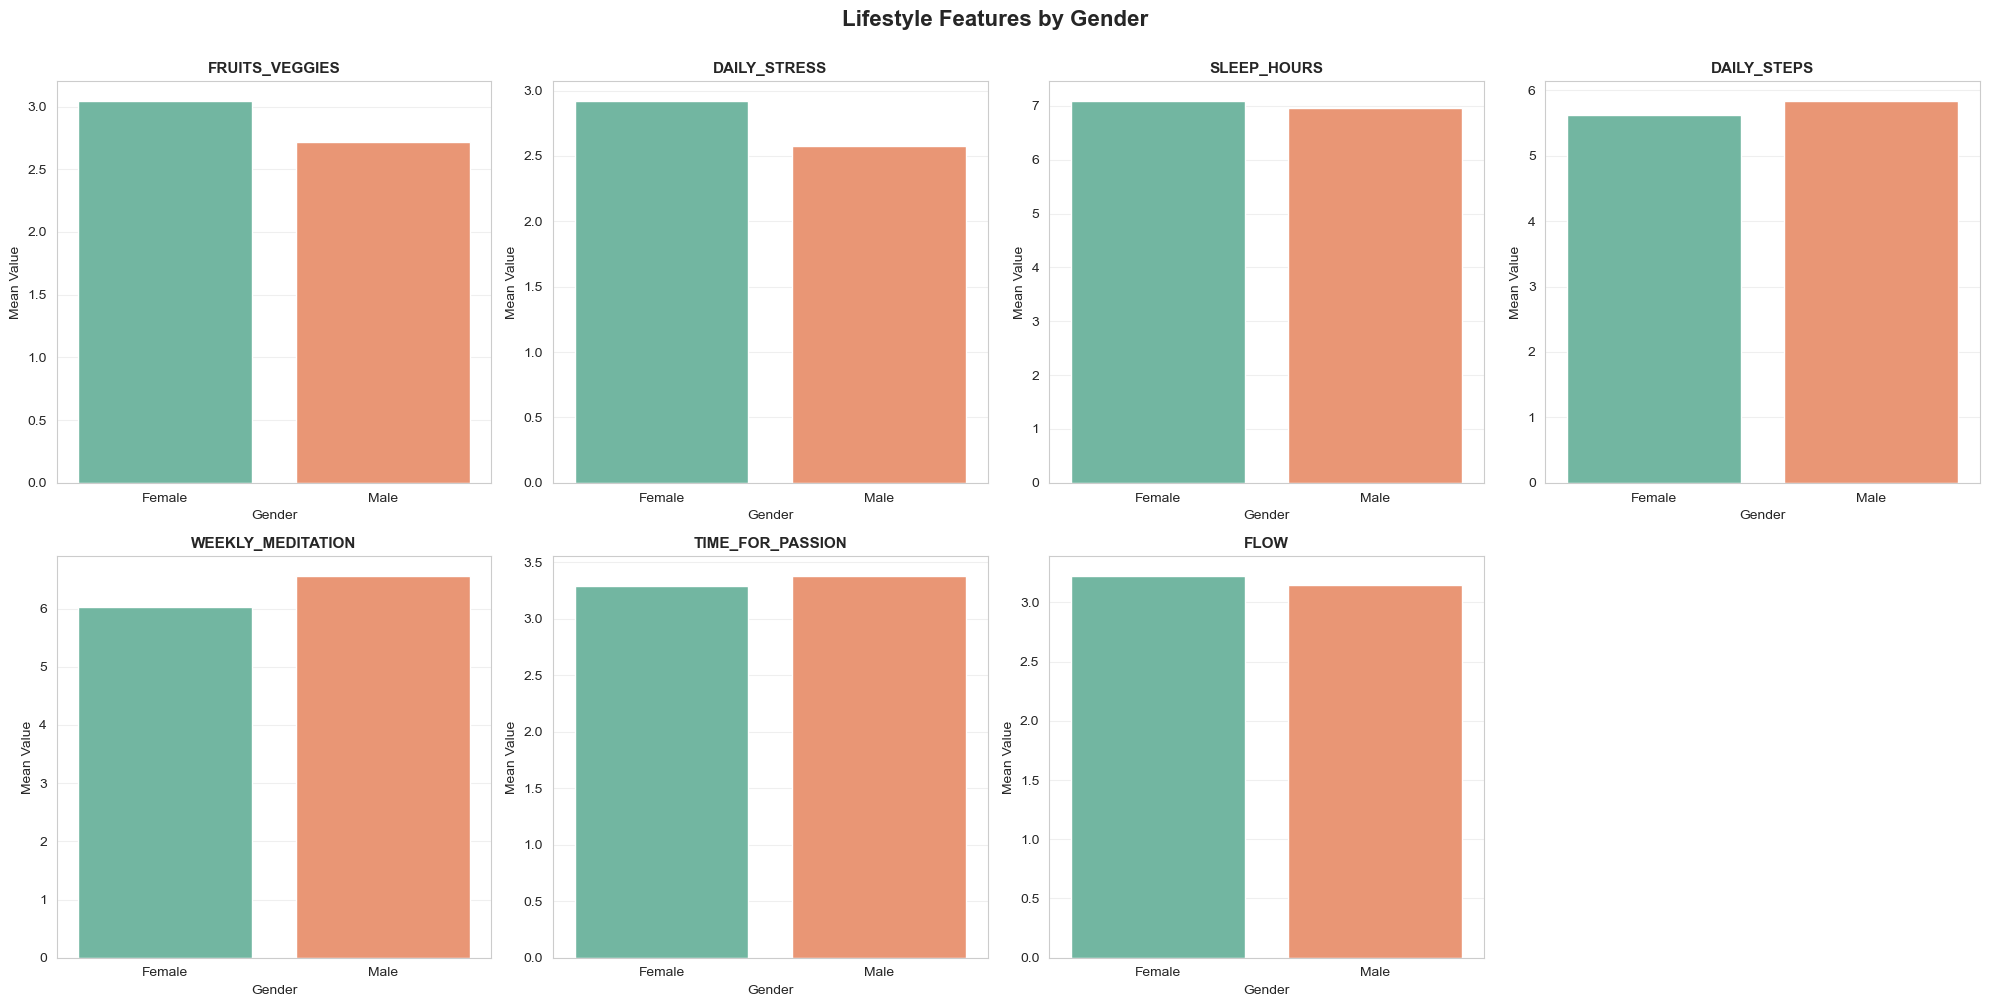

In [23]:
# Additional demographic insights - Key features by gender
print("KEY LIFESTYLE FEATURES BY GENDER")
print("-" * 80)

lifestyle_features = ['FRUITS_VEGGIES', 'DAILY_STRESS', 'SLEEP_HOURS', 'DAILY_STEPS', 
                      'WEEKLY_MEDITATION', 'TIME_FOR_PASSION', 'FLOW']

# Ensure lifestyle features are numeric
for col in lifestyle_features:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

gender_lifestyle = df_clean.groupby('GENDER')[lifestyle_features].mean().round(2)
print(gender_lifestyle.T)

# Visualize
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, feature in enumerate(lifestyle_features):
    sns.barplot(data=df_clean, x='GENDER', y=feature, ax=axes[idx], palette='Set2', ci=None)
    axes[idx].set_title(f'{feature}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Gender', fontsize=10)
    axes[idx].set_ylabel('Mean Value', fontsize=10)
    axes[idx].grid(alpha=0.3, axis='y')

# Hide last subplot
axes[7].axis('off')

plt.suptitle('Lifestyle Features by Gender', fontsize=16, fontweight='bold', y=1.002)
plt.tight_layout()
plt.show()


KEY LIFESTYLE FEATURES BY AGE GROUP
--------------------------------------------------------------------------------
              FRUITS_VEGGIES  DAILY_STRESS  SLEEP_HOURS  DAILY_STEPS  \
AGE                                                                    
21 to 35                2.69          2.81         7.11         5.59   
36 to 50                3.01          2.89         6.96         5.77   
51 or more              3.36          2.63         6.97         5.65   
Less than 20            2.67          2.76         7.18         5.99   

              WEEKLY_MEDITATION  TIME_FOR_PASSION  FLOW  
AGE                                                      
21 to 35                   6.09              3.32  3.11  
36 to 50                   5.98              3.23  3.15  
51 or more                 7.00              3.47  3.34  
Less than 20               5.96              3.35  3.32  


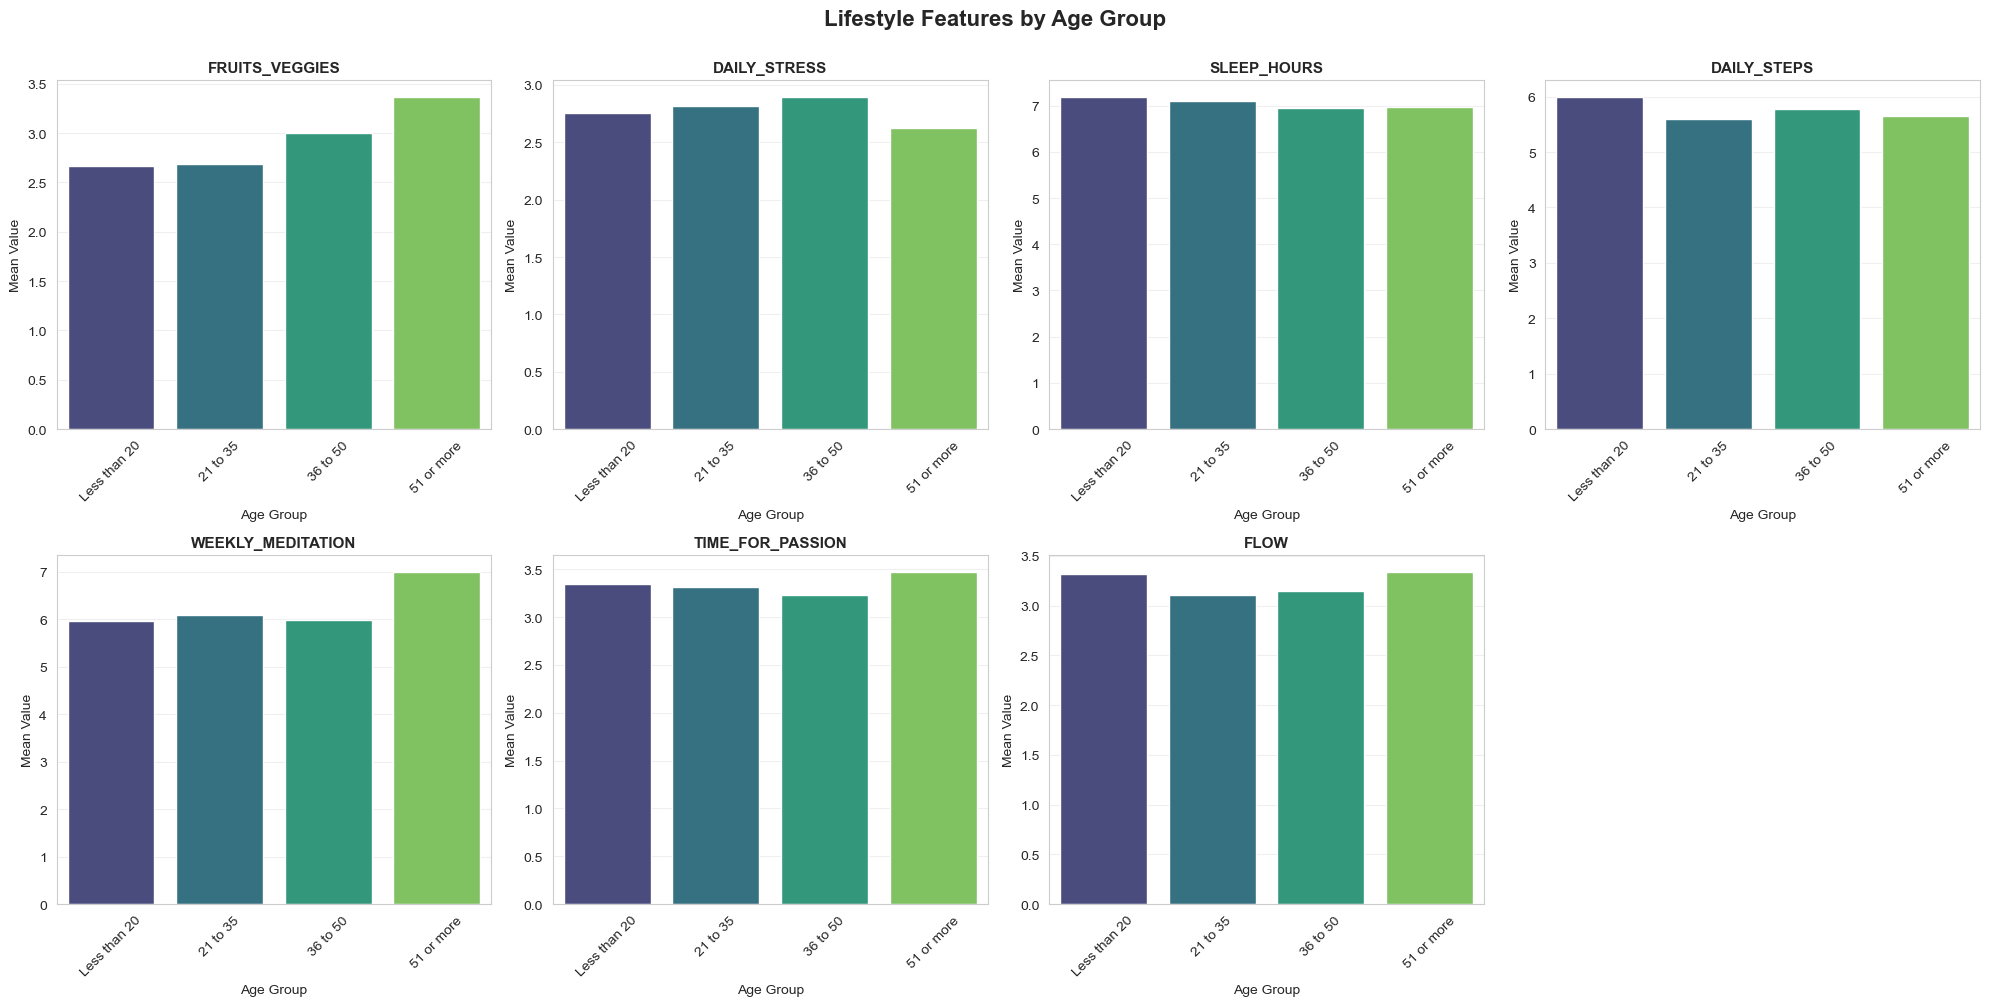

In [24]:
# Key features by age group
print("KEY LIFESTYLE FEATURES BY AGE GROUP")
print("-" * 80)

age_lifestyle = df_clean.groupby('AGE')[lifestyle_features].mean().round(2)
print(age_lifestyle)

# Visualize
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, feature in enumerate(lifestyle_features):
    sns.barplot(data=df_clean, x='AGE', y=feature, ax=axes[idx], 
                order=age_order, palette='viridis', ci=None)
    axes[idx].set_title(f'{feature}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Age Group', fontsize=10)
    axes[idx].set_ylabel('Mean Value', fontsize=10)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(alpha=0.3, axis='y')

# Hide last subplot
axes[7].axis('off')

plt.suptitle('Lifestyle Features by Age Group', fontsize=16, fontweight='bold', y=1.002)
plt.tight_layout()
plt.show()


## 1.6 Save Clean Dataset


In [25]:
# Save the clean dataset for future use
df_clean.to_csv('wellbeing_data_clean.csv', index=False)
print("Clean dataset saved as 'wellbeing_data_clean.csv'")
print(f"Shape: {df_clean.shape}")
print(f"Columns: {df_clean.columns.tolist()}")


Clean dataset saved as 'wellbeing_data_clean.csv'
Shape: (15972, 24)
Columns: ['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE']


# Section 2: Feature Engineering & Preprocessing

This section creates composite wellness scores and prepares the data for clustering analysis.


## 2.1 Create Composite Wellness Scores

We'll create three composite scores representing different dimensions of wellbeing:
- **Physical Health Score**: Combines nutrition, BMI, physical activity, and sleep
- **Mental Health Score**: Combines stress management, flow state, meditation, and vacation balance
- **Social Health Score**: Combines social connections and support networks


In [26]:
# Import additional libraries for preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import os

# Create a copy for feature engineering
df_features = df_clean.copy()

print("STARTING FEATURE ENGINEERING")
print("-" * 80)
print(f"Starting dataset shape: {df_features.shape}")
print(f"Columns: {df_features.columns.tolist()}")


STARTING FEATURE ENGINEERING
--------------------------------------------------------------------------------
Starting dataset shape: (15972, 24)
Columns: ['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE']


In [27]:
# Function to normalize features to 0-10 scale for composite scores
def normalize_to_scale(series, target_min=0, target_max=10):
    """Normalize a series to a target scale (default 0-10)"""
    if series.max() == series.min():
        return series
    normalized = (series - series.min()) / (series.max() - series.min())
    return normalized * (target_max - target_min) + target_min

# 1. PHYSICAL HEALTH SCORE
print("CREATING PHYSICAL HEALTH SCORE")
print("-" * 80)

# Components: FRUITS_VEGGIES, BMI_RANGE, DAILY_STEPS, SLEEP_HOURS
physical_components = {
    'FRUITS_VEGGIES': df_features['FRUITS_VEGGIES'],
    'BMI_RANGE': df_features['BMI_RANGE'],
    'DAILY_STEPS': df_features['DAILY_STEPS'],
    'SLEEP_HOURS': df_features['SLEEP_HOURS']
}

# Normalize each component to 0-10 scale
physical_normalized = {}
for name, component in physical_components.items():
    physical_normalized[name] = normalize_to_scale(component)
    print(f"{name}: min={component.min():.2f}, max={component.max():.2f}, mean={component.mean():.2f}")

# Create Physical Health Score (average of normalized components)
df_features['PHYSICAL_HEALTH_SCORE'] = (
    physical_normalized['FRUITS_VEGGIES'] + 
    physical_normalized['BMI_RANGE'] + 
    physical_normalized['DAILY_STEPS'] + 
    physical_normalized['SLEEP_HOURS']
) / 4

print(f"\nPhysical Health Score created!")
print(f"Mean: {df_features['PHYSICAL_HEALTH_SCORE'].mean():.2f}")
print(f"Std: {df_features['PHYSICAL_HEALTH_SCORE'].std():.2f}")
print(f"Range: [{df_features['PHYSICAL_HEALTH_SCORE'].min():.2f}, {df_features['PHYSICAL_HEALTH_SCORE'].max():.2f}]")


CREATING PHYSICAL HEALTH SCORE
--------------------------------------------------------------------------------
FRUITS_VEGGIES: min=0.00, max=5.00, mean=2.92
BMI_RANGE: min=1.00, max=2.00, mean=1.41
DAILY_STEPS: min=1.00, max=10.00, mean=5.70
SLEEP_HOURS: min=1.00, max=10.00, mean=7.04

Physical Health Score created!
Mean: 5.47
Std: 1.62
Range: [0.00, 10.00]


In [28]:
# 2. MENTAL HEALTH SCORE
print("CREATING MENTAL HEALTH SCORE")
print("-" * 80)

# Components: DAILY_STRESS (inverted), FLOW, WEEKLY_MEDITATION, LOST_VACATION (inverted)
# Note: Lower stress and lower lost vacation are better, so we'll invert them

mental_components = {
    'DAILY_STRESS': df_features['DAILY_STRESS'],
    'FLOW': df_features['FLOW'],
    'WEEKLY_MEDITATION': df_features['WEEKLY_MEDITATION'],
    'LOST_VACATION': df_features['LOST_VACATION']
}

# Normalize each component
mental_normalized = {}
for name, component in mental_components.items():
    mental_normalized[name] = normalize_to_scale(component)
    print(f"{name}: min={component.min():.2f}, max={component.max():.2f}, mean={component.mean():.2f}")

# Invert DAILY_STRESS and LOST_VACATION (lower is better)
mental_normalized['DAILY_STRESS'] = 10 - mental_normalized['DAILY_STRESS']
mental_normalized['LOST_VACATION'] = 10 - mental_normalized['LOST_VACATION']

# Create Mental Health Score (average of normalized components)
df_features['MENTAL_HEALTH_SCORE'] = (
    mental_normalized['DAILY_STRESS'] + 
    mental_normalized['FLOW'] + 
    mental_normalized['WEEKLY_MEDITATION'] + 
    mental_normalized['LOST_VACATION']
) / 4

print(f"\nMental Health Score created!")
print(f"Mean: {df_features['MENTAL_HEALTH_SCORE'].mean():.2f}")
print(f"Std: {df_features['MENTAL_HEALTH_SCORE'].std():.2f}")
print(f"Range: [{df_features['MENTAL_HEALTH_SCORE'].min():.2f}, {df_features['MENTAL_HEALTH_SCORE'].max():.2f}]")


CREATING MENTAL HEALTH SCORE
--------------------------------------------------------------------------------
DAILY_STRESS: min=0.00, max=5.00, mean=2.79
FLOW: min=0.00, max=10.00, mean=3.19
WEEKLY_MEDITATION: min=0.00, max=10.00, mean=6.23
LOST_VACATION: min=0.00, max=10.00, mean=2.90

Mental Health Score created!
Mean: 5.24
Std: 1.76
Range: [0.00, 10.00]


In [29]:
# 3. SOCIAL HEALTH SCORE
print("CREATING SOCIAL HEALTH SCORE")
print("-" * 80)

# Components: CORE_CIRCLE, SOCIAL_NETWORK, SUPPORTING_OTHERS
social_components = {
    'CORE_CIRCLE': df_features['CORE_CIRCLE'],
    'SOCIAL_NETWORK': df_features['SOCIAL_NETWORK'],
    'SUPPORTING_OTHERS': df_features['SUPPORTING_OTHERS']
}

# Normalize each component
social_normalized = {}
for name, component in social_components.items():
    social_normalized[name] = normalize_to_scale(component)
    print(f"{name}: min={component.min():.2f}, max={component.max():.2f}, mean={component.mean():.2f}")

# Create Social Health Score (average of normalized components)
df_features['SOCIAL_HEALTH_SCORE'] = (
    social_normalized['CORE_CIRCLE'] + 
    social_normalized['SOCIAL_NETWORK'] + 
    social_normalized['SUPPORTING_OTHERS']
) / 3

print(f"\nSocial Health Score created!")
print(f"Mean: {df_features['SOCIAL_HEALTH_SCORE'].mean():.2f}")
print(f"Std: {df_features['SOCIAL_HEALTH_SCORE'].std():.2f}")
print(f"Range: [{df_features['SOCIAL_HEALTH_SCORE'].min():.2f}, {df_features['SOCIAL_HEALTH_SCORE'].max():.2f}]")


CREATING SOCIAL HEALTH SCORE
--------------------------------------------------------------------------------
CORE_CIRCLE: min=0.00, max=10.00, mean=5.51
SOCIAL_NETWORK: min=0.00, max=10.00, mean=6.47
SUPPORTING_OTHERS: min=0.00, max=10.00, mean=5.62

Social Health Score created!
Mean: 5.87
Std: 2.26
Range: [0.00, 10.00]


COMPOSITE SCORES SUMMARY
--------------------------------------------------------------------------------

Checking for missing values in composite scores:
  PHYSICAL_HEALTH_SCORE: 0 NaN values
  MENTAL_HEALTH_SCORE: 1 NaN values
  SOCIAL_HEALTH_SCORE: 0 NaN values
  Filled MENTAL_HEALTH_SCORE NaN with median: 5.25


       PHYSICAL_HEALTH_SCORE  MENTAL_HEALTH_SCORE  SOCIAL_HEALTH_SCORE
count               15972.00             15972.00             15972.00
mean                    5.47                 5.24                 5.87
std                     1.62                 1.76                 2.26
min                     0.00                 0.00                 0.00
25%                     4.33                 4.00                 4.00
50%                     5.44                 5.25                 6.00
75%                     6.61                 6.50                 7.67
max                    10.00                10.00                10.00


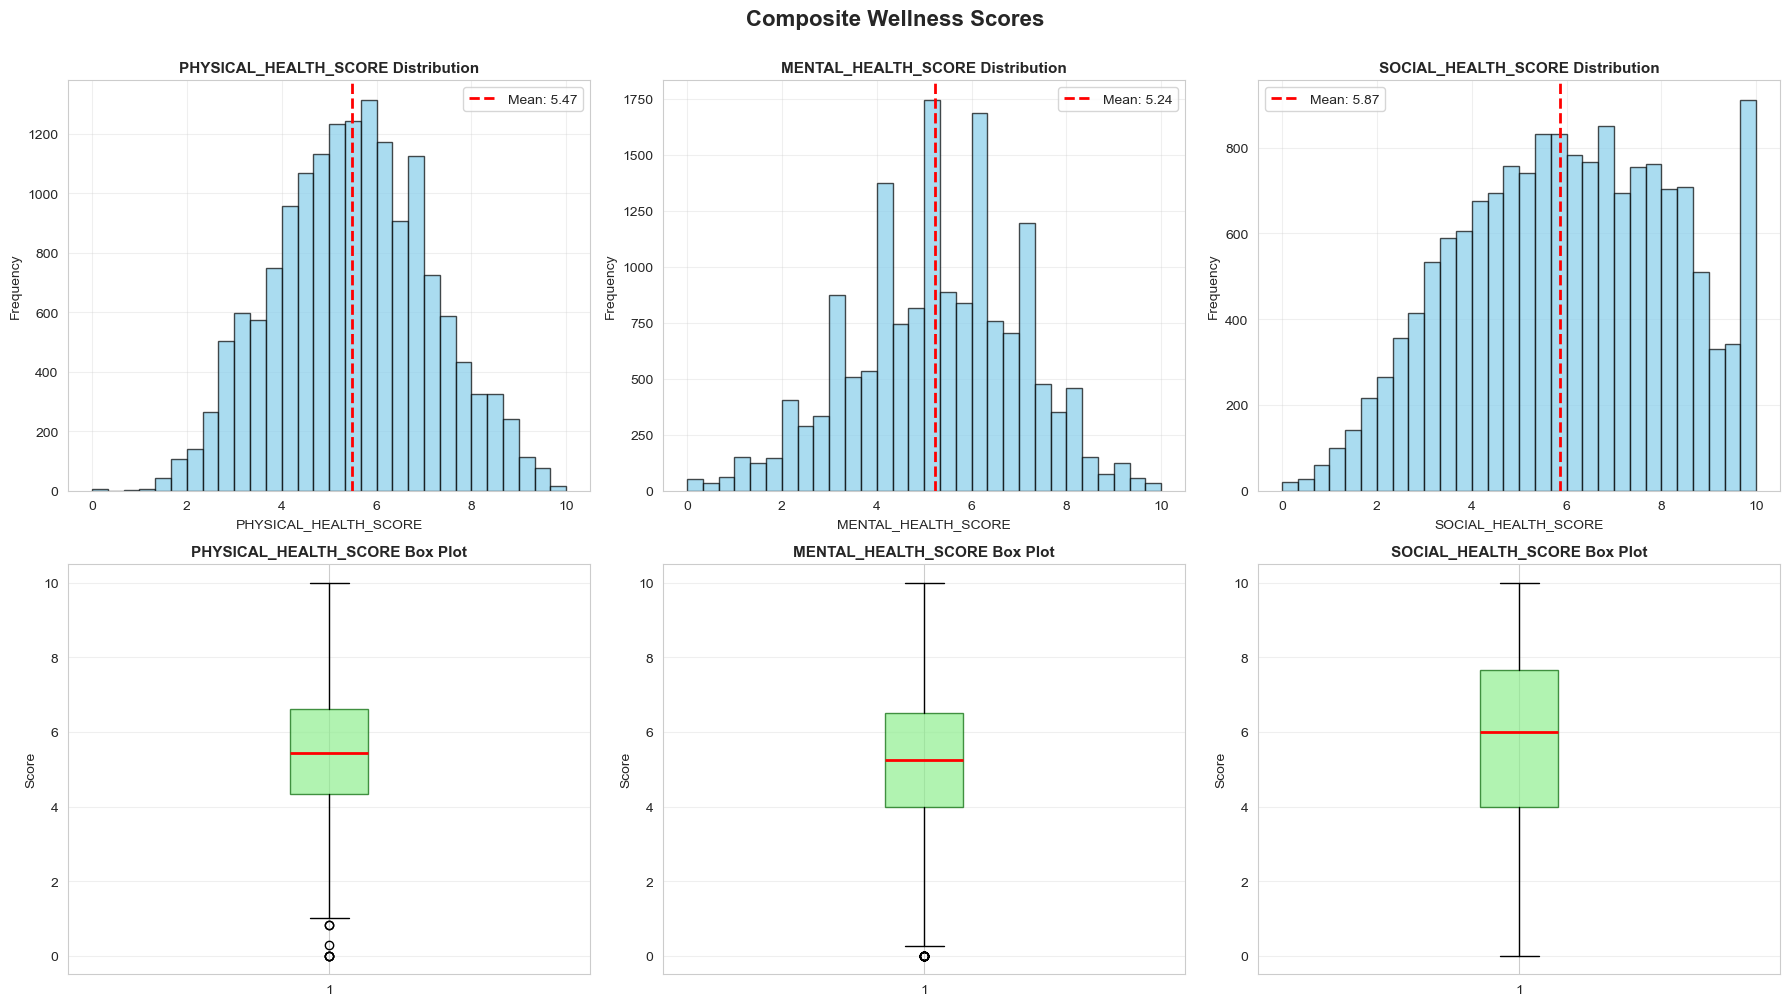

In [30]:
# Visualize the composite scores
print("COMPOSITE SCORES SUMMARY")
print("-" * 80)

composite_scores = ['PHYSICAL_HEALTH_SCORE', 'MENTAL_HEALTH_SCORE', 'SOCIAL_HEALTH_SCORE']

# Check for NaN values in composite scores
print("\nChecking for missing values in composite scores:")
for score in composite_scores:
    nan_count = df_features[score].isna().sum()
    print(f"  {score}: {nan_count} NaN values")

# Fill NaN values with median for visualization (if any exist)
for score in composite_scores:
    if df_features[score].isna().sum() > 0:
        median_val = df_features[score].median()
        df_features[score] = df_features[score].fillna(median_val)
        print(f"  Filled {score} NaN with median: {median_val:.2f}")

summary_stats = df_features[composite_scores].describe().round(2)
print("\n")
print(summary_stats)

# Create visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Histograms
for idx, score in enumerate(composite_scores):
    data = df_features[score].dropna()  # Drop NaN for safety
    axes[0, idx].hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0, idx].set_title(f'{score} Distribution', fontsize=11, fontweight='bold')
    axes[0, idx].set_xlabel(score, fontsize=10)
    axes[0, idx].set_ylabel('Frequency', fontsize=10)
    axes[0, idx].axvline(data.mean(), color='red', linestyle='--', 
                        linewidth=2, label=f'Mean: {data.mean():.2f}')
    axes[0, idx].legend()
    axes[0, idx].grid(alpha=0.3)

# Box plots
for idx, score in enumerate(composite_scores):
    data = df_features[score].dropna()  # Drop NaN for box plot
    axes[1, idx].boxplot(data, vert=True, patch_artist=True,
                        boxprops=dict(facecolor='lightgreen', color='darkgreen', alpha=0.7),
                        medianprops=dict(color='red', linewidth=2))
    axes[1, idx].set_title(f'{score} Box Plot', fontsize=11, fontweight='bold')
    axes[1, idx].set_ylabel('Score', fontsize=10)
    axes[1, idx].grid(alpha=0.3, axis='y')

plt.suptitle('Composite Wellness Scores', fontsize=16, fontweight='bold', y=1.002)
plt.tight_layout()
plt.show()


## 2.2 Encode Categorical Variables

We'll encode AGE and GENDER variables for machine learning models.


In [31]:
print("ENCODING CATEGORICAL VARIABLES")
print("-" * 80)

# Keep original categorical variables for reference
df_features['AGE_ORIGINAL'] = df_features['AGE']
df_features['GENDER_ORIGINAL'] = df_features['GENDER']

# 1. Label Encoding for AGE (ordinal variable)
age_order = ['Less than 20', '21 to 35', '36 to 50', '51 or more']
age_mapping = {age: idx for idx, age in enumerate(age_order)}

df_features['AGE_ENCODED'] = df_features['AGE'].map(age_mapping)
print("\nAge Encoding:")
for age, code in age_mapping.items():
    count = (df_features['AGE'] == age).sum()
    print(f"  {age}: {code} (n={count})")

# 2. Binary Encoding for GENDER
gender_mapping = {'Male': 1, 'Female': 0}
df_features['GENDER_ENCODED'] = df_features['GENDER'].map(gender_mapping)
print("\nGender Encoding:")
for gender, code in gender_mapping.items():
    count = (df_features['GENDER'] == gender).sum()
    print(f"  {gender}: {code} (n={count})")

# 3. One-Hot Encoding for AGE (for models that benefit from it)
age_dummies = pd.get_dummies(df_features['AGE'], prefix='AGE')
df_features = pd.concat([df_features, age_dummies], axis=1)

print("\nOne-Hot Encoded Age Columns:")
print([col for col in df_features.columns if col.startswith('AGE_')])

print(f"\nDataset shape after encoding: {df_features.shape}")


ENCODING CATEGORICAL VARIABLES
--------------------------------------------------------------------------------

Age Encoding:
  Less than 20: 0 (n=1819)
  21 to 35: 1 (n=6108)
  36 to 50: 2 (n=4655)
  51 or more: 3 (n=3390)

Gender Encoding:
  Male: 1 (n=6114)
  Female: 0 (n=9858)

One-Hot Encoded Age Columns:
['AGE_ORIGINAL', 'AGE_ENCODED', 'AGE_21 to 35', 'AGE_36 to 50', 'AGE_51 or more', 'AGE_Less than 20']

Dataset shape after encoding: (15972, 35)


## 2.3 Standardize and Normalize Features

For clustering algorithms, we need to scale all features to the same range to prevent features with larger scales from dominating the distance calculations.


In [32]:
print("FEATURE STANDARDIZATION AND NORMALIZATION")
print("-" * 80)

# Select numerical features to scale (exclude original categorical columns and Timestamp)
exclude_cols = ['Timestamp', 'AGE', 'GENDER', 'AGE_ORIGINAL', 'GENDER_ORIGINAL']
numerical_features = [col for col in df_features.columns if col not in exclude_cols and not col.startswith('AGE_')]

print(f"\nNumber of numerical features to scale: {len(numerical_features)}")
print(f"Features: {numerical_features[:10]}...")  # Show first 10

# Create a copy for scaled features
df_scaled = df_features.copy()

# Method 1: StandardScaler (z-score normalization: mean=0, std=1)
# Best for algorithms that assume normally distributed data
scaler_standard = StandardScaler()
df_scaled[numerical_features] = scaler_standard.fit_transform(df_features[numerical_features])


print("STANDARDIZATION APPLIED (StandardScaler)")
print("-" * 80)
print("\nSample statistics after standardization:")
sample_features = ['WORK_LIFE_BALANCE_SCORE', 'PHYSICAL_HEALTH_SCORE', 
                   'MENTAL_HEALTH_SCORE', 'SOCIAL_HEALTH_SCORE']
for feature in sample_features:
    if feature in df_scaled.columns:
        print(f"{feature}:")
        print(f"  Mean: {df_scaled[feature].mean():.6f}")
        print(f"  Std: {df_scaled[feature].std():.6f}")
        print(f"  Min: {df_scaled[feature].min():.2f}")
        print(f"  Max: {df_scaled[feature].max():.2f}")

# Also create MinMax scaled version (0-1 range)
# Better for clustering algorithms like K-Means
df_minmax = df_features.copy()
scaler_minmax = MinMaxScaler()
df_minmax[numerical_features] = scaler_minmax.fit_transform(df_features[numerical_features])

print("-" * 80)
print("MIN-MAX NORMALIZATION APPLIED (0-1 range)")
print("-" * 80)
print("\nSample statistics after min-max scaling:")
for feature in sample_features:
    if feature in df_minmax.columns:
        print(f"{feature}:")
        print(f"  Min: {df_minmax[feature].min():.6f}")
        print(f"  Max: {df_minmax[feature].max():.6f}")
        print(f"  Mean: {df_minmax[feature].mean():.4f}")

print(f"\nScaled dataset shape: {df_scaled.shape}")
print(f"MinMax scaled dataset shape: {df_minmax.shape}")


FEATURE STANDARDIZATION AND NORMALIZATION
--------------------------------------------------------------------------------

Number of numerical features to scale: 25
Features: ['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION', 'BMI_RANGE', 'TODO_COMPLETED']...
STANDARDIZATION APPLIED (StandardScaler)
--------------------------------------------------------------------------------

Sample statistics after standardization:
WORK_LIFE_BALANCE_SCORE:
  Mean: 0.000000
  Std: 1.000031
  Min: -4.15
  Max: 3.41
PHYSICAL_HEALTH_SCORE:
  Mean: -0.000000
  Std: 1.000031
  Min: -3.38
  Max: 2.79
MENTAL_HEALTH_SCORE:
  Mean: -0.000000
  Std: 1.000031
  Min: -2.97
  Max: 2.70
SOCIAL_HEALTH_SCORE:
  Mean: 0.000000
  Std: 1.000031
  Min: -2.59
  Max: 1.83
--------------------------------------------------------------------------------
MIN-MAX NORMALIZATION APPLIED (0-1 range)
---------------------------------------------

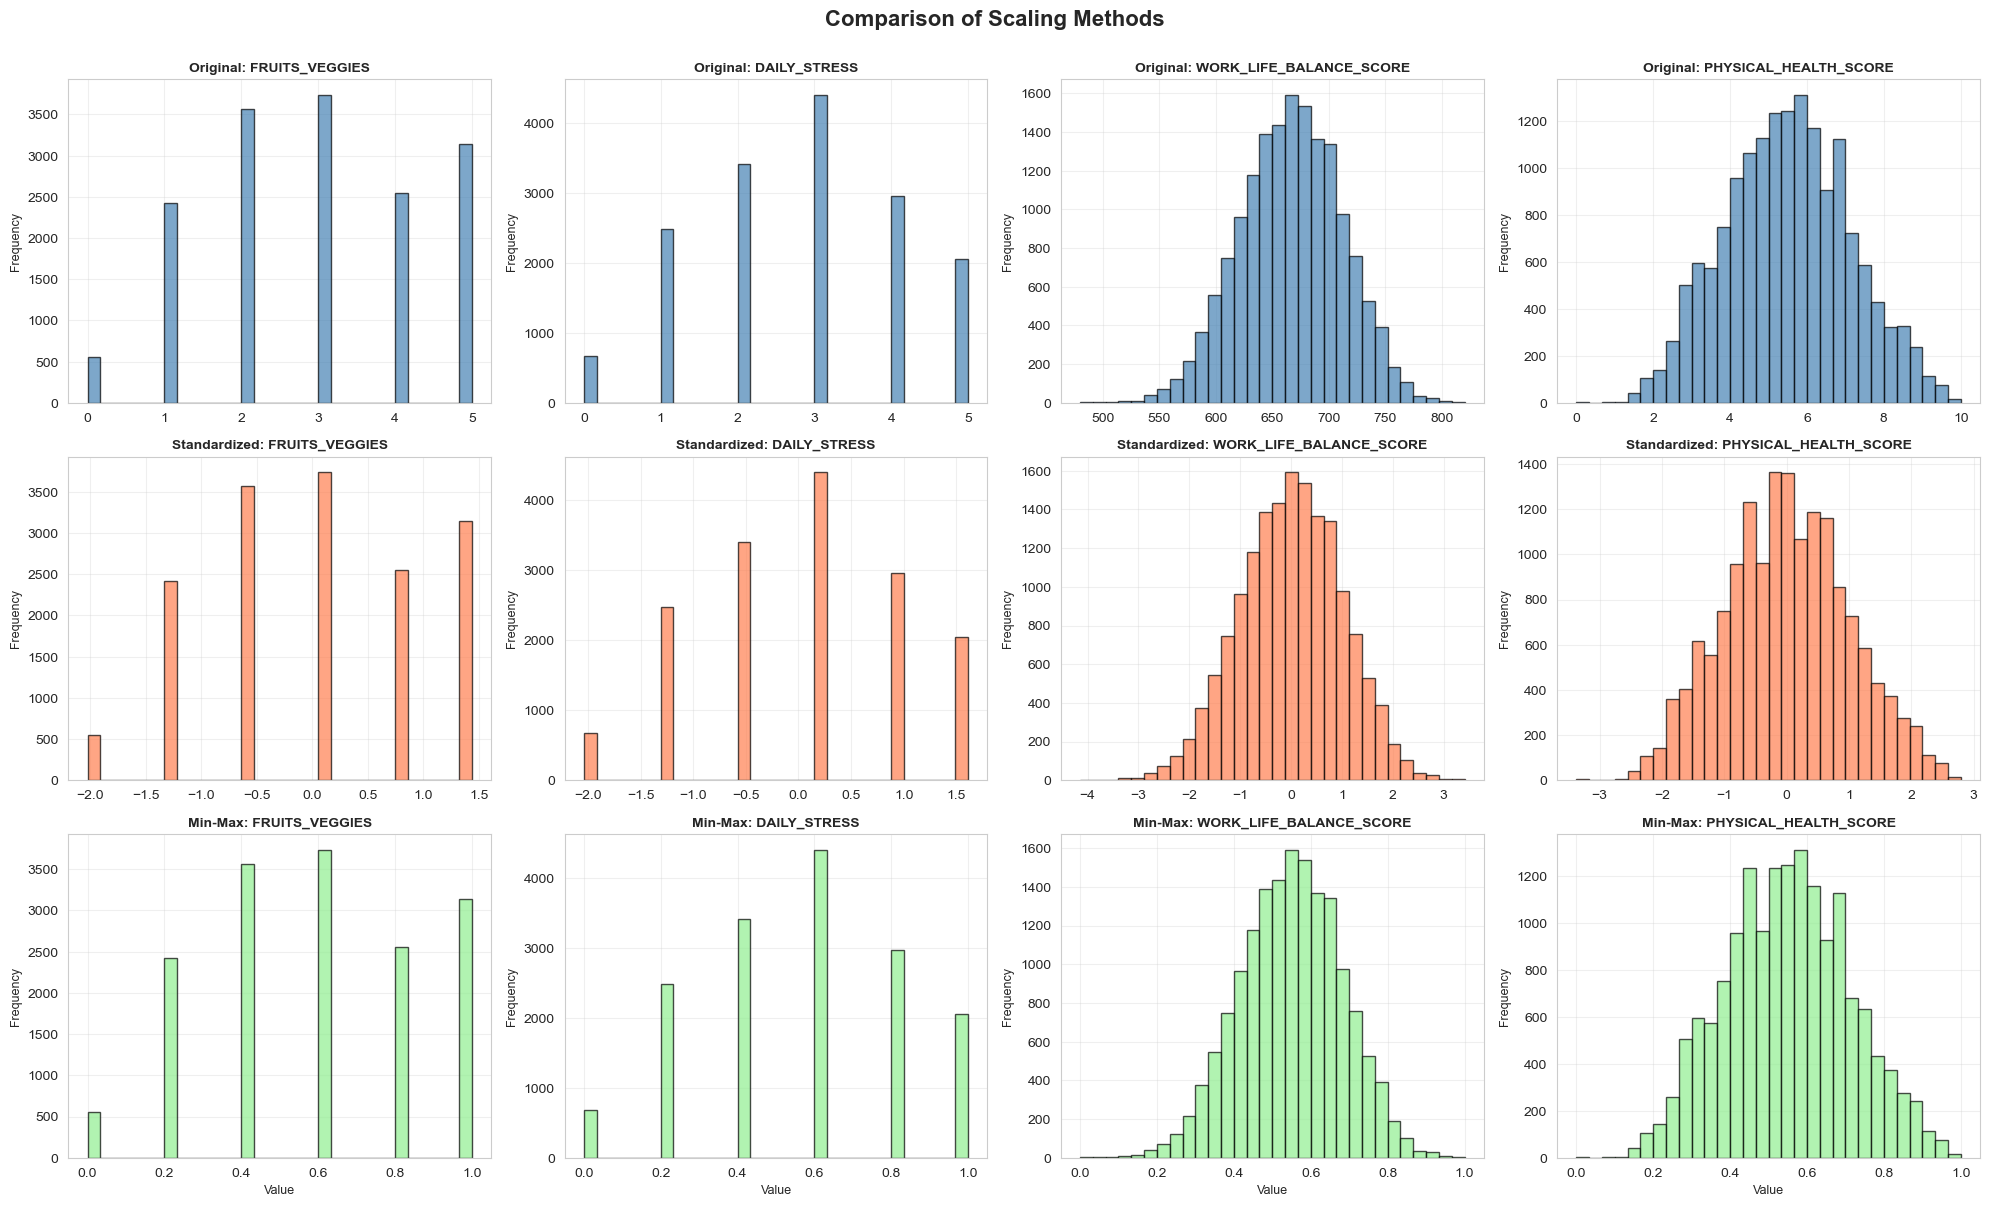

In [33]:
# Visualize the effect of scaling
comparison_features = ['FRUITS_VEGGIES', 'DAILY_STRESS', 'WORK_LIFE_BALANCE_SCORE', 
                       'PHYSICAL_HEALTH_SCORE']

fig, axes = plt.subplots(3, 4, figsize=(20, 12))

for idx, feature in enumerate(comparison_features):
    # Original
    axes[0, idx].hist(df_features[feature], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[0, idx].set_title(f'Original: {feature}', fontsize=10, fontweight='bold')
    axes[0, idx].set_ylabel('Frequency', fontsize=9)
    axes[0, idx].grid(alpha=0.3)
    
    # Standardized
    axes[1, idx].hist(df_scaled[feature], bins=30, color='coral', edgecolor='black', alpha=0.7)
    axes[1, idx].set_title(f'Standardized: {feature}', fontsize=10, fontweight='bold')
    axes[1, idx].set_ylabel('Frequency', fontsize=9)
    axes[1, idx].grid(alpha=0.3)
    
    # Min-Max Scaled
    axes[2, idx].hist(df_minmax[feature], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
    axes[2, idx].set_title(f'Min-Max: {feature}', fontsize=10, fontweight='bold')
    axes[2, idx].set_xlabel('Value', fontsize=9)
    axes[2, idx].set_ylabel('Frequency', fontsize=9)
    axes[2, idx].grid(alpha=0.3)

plt.suptitle('Comparison of Scaling Methods', fontsize=16, fontweight='bold', y=1.002)
plt.tight_layout()
plt.show()


## 2.4 Save Processed Datasets

We'll save multiple versions of the processed data for different use cases.


In [34]:
print("SAVING PROCESSED DATASETS")
print("-" * 80)

# Create data directory if it doesn't exist
data_dir = 'data'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    print(f"Created directory: {data_dir}/")
else:
    print(f"Directory already exists: {data_dir}/")

# Define file paths
files_to_save = {
    'Original with Features': (df_features, f'{data_dir}/wellbeing_with_features.csv'),
    'Standardized (Z-score)': (df_scaled, f'{data_dir}/wellbeing_standardized.csv'),
    'MinMax Normalized (0-1)': (df_minmax, f'{data_dir}/processed_wellbeing_data.csv')
}

# Save all versions
print("\nSaving files:")
for description, (dataframe, filepath) in files_to_save.items():
    dataframe.to_csv(filepath, index=False)
    file_size = os.path.getsize(filepath) / 1024  # Size in KB
    print(f"  {description}: {filepath}")
    print(f"    Shape: {dataframe.shape}, Size: {file_size:.2f} KB")

print("\n" + "-" * 80)
print("DATASET SUMMARY")
print("-" * 80)
print(f"\nOriginal columns: {len(df.columns)}")
print(f"New columns added: {len(df_features.columns) - len(df.columns)}")
print(f"Total columns in processed data: {len(df_features.columns)}")

print("\nNew features created:")
new_features = ['PHYSICAL_HEALTH_SCORE', 'MENTAL_HEALTH_SCORE', 'SOCIAL_HEALTH_SCORE',
                'AGE_ENCODED', 'GENDER_ENCODED']
for feature in new_features:
    if feature in df_features.columns:
        print(f"   {feature}")
        
print("\n" + "-" * 80)
print("FILES READY FOR CLUSTERING ANALYSIS!")
print("-" * 80)
print("\nRecommended file for clustering: data/processed_wellbeing_data.csv")
print("  - All features normalized to 0-1 range")
print("  - Composite health scores included")
print("  - Categorical variables encoded")
print("  - Ready for K-Means, DBSCAN, Hierarchical clustering")


SAVING PROCESSED DATASETS
--------------------------------------------------------------------------------
Directory already exists: data/

Saving files:
  Original with Features: data/wellbeing_with_features.csv
    Shape: (15972, 35), Size: 2400.74 KB
  Standardized (Z-score): data/wellbeing_standardized.csv
    Shape: (15972, 35), Size: 8662.94 KB
  MinMax Normalized (0-1): data/processed_wellbeing_data.csv
    Shape: (15972, 35), Size: 4682.68 KB

--------------------------------------------------------------------------------
DATASET SUMMARY
--------------------------------------------------------------------------------

Original columns: 24
New columns added: 11
Total columns in processed data: 35

New features created:
   PHYSICAL_HEALTH_SCORE
   MENTAL_HEALTH_SCORE
   SOCIAL_HEALTH_SCORE
   AGE_ENCODED
   GENDER_ENCODED

--------------------------------------------------------------------------------
FILES READY FOR CLUSTERING ANALYSIS!
----------------------------------------

In [35]:
# Display final feature matrix summary
print("FINAL FEATURE MATRIX FOR CLUSTERING")
print("-" * 80)

# Show sample of processed data
print("\nSample of processed data (first 5 rows, key features):")
key_columns = ['PHYSICAL_HEALTH_SCORE', 'MENTAL_HEALTH_SCORE', 'SOCIAL_HEALTH_SCORE',
               'WORK_LIFE_BALANCE_SCORE', 'AGE_ENCODED', 'GENDER_ENCODED']
print(df_minmax[key_columns].head())

print("\n" + "-" * 80)
print("Data types in processed dataset:")
print(df_minmax.dtypes.value_counts())

print("\n" + "-" * 80)
print(" Section 2: Feature Engineering & Preprocessing - COMPLETE")


FINAL FEATURE MATRIX FOR CLUSTERING
--------------------------------------------------------------------------------

Sample of processed data (first 5 rows, key features):
   PHYSICAL_HEALTH_SCORE  MENTAL_HEALTH_SCORE  SOCIAL_HEALTH_SCORE  \
0               0.427778                0.500             0.333333   
1               0.655556                0.500             0.700000   
2               0.627778                0.225             0.600000   
3               0.622222                0.300             0.666667   
4               0.777778                0.575             0.566667   

   WORK_LIFE_BALANCE_SCORE  AGE_ENCODED  GENDER_ENCODED  
0                 0.380658            2             0.0  
1                 0.516167            2             0.0  
2                 0.445620            2             0.0  
3                 0.419459            3             0.0  
4                 0.540564            3             0.0  

---------------------------------------------------------